In [ ]:
# Student ID: 1010752829
# Student name: Nargiz Guliyeva
# Instructor: Dr. Shion Gupa
# Course code:INF 2178
# Course name: Experimental Design for Data Science
# Program: MI
# Faculty of Information
# University of Toronto

# Technical Assignment 1
# Date created: 01.27.2024
# Date modified: 02.04.2024

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as stats
from scipy.stats import iqr
from scipy.stats import mannwhitneyu
from tabulate import tabulate

### **Initial Exploration**

In [2]:
# Import the excel file in the coLab "Files" section and then assign it to a new variable "data"
data=pd.read_excel("INF2178_A1_data.xlsx")

In [3]:
data.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


In [4]:
# Explore the data with the various methods using the function 'explore data'
def explore_data(data):
    data.shape # Display shape of the DataFrame
    print(f"Data Shape: {data.shape}\n")

    # Display information about the DataFrame
    print("Data Info:")
    data.info()
    print("\n")

    # Display the number of duplicated rows
    # Source: Digital Ocean
    duplicated_count = data.duplicated().sum()
    print(f"Number of Duplicated Rows: {duplicated_count}\n")

explore_data(data)

Data Shape: (50944, 14)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   OCCUPANCY_DATE          50944 non-null  datetime64[ns]
 1   ORGANIZATION_NAME       50944 non-null  object        
 2   PROGRAM_ID              50944 non-null  int64         
 3   PROGRAM_NAME            50909 non-null  object        
 4   SECTOR                  50944 non-null  object        
 5   PROGRAM_MODEL           50942 non-null  object        
 6   OVERNIGHT_SERVICE_TYPE  50942 non-null  object        
 7   PROGRAM_AREA            50942 non-null  object        
 8   SERVICE_USER_COUNT      50944 non-null  int64         
 9   CAPACITY_TYPE           50944 non-null  object        
 10  CAPACITY_ACTUAL_BED     32399 non-null  float64       
 11  OCCUPIED_BEDS           32399 non-null  float64       
 12  CAPACITY_A

In [5]:
# Describe the dataset by determining descriptive statistics
data.describe(include='all')

<ipython-input-5-22d18311d607>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')


,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
count,50944,50944,50944.000000,50909,50944,50942,50942,50942,50944.000000,50944,32399.000000,32399.000000,18545.000000,18545.000000
unique,365,35,NaN,167,5,2,7,4,NaN,2,NaN,NaN,NaN,NaN
top,2021-03-02 00:00:00,City of Toronto,NaN,545 Lake Shore Blvd W. Women,Mixed Adult,Emergency,Shelter,Base Shelter and Overnight Services System,NaN,Bed Based Capacity,NaN,NaN,NaN,NaN
freq,149,11960,NaN,365,15533,41541,31465,34398,NaN,32399,NaN,NaN,NaN,NaN
first,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,13986.125844,NaN,NaN,NaN,NaN,NaN,45.727171,NaN,31.627149,29.780271,55.549259,52.798598
std,NaN,NaN,1705.288632,NaN,NaN,NaN,NaN,NaN,53.326049,NaN,27.127682,26.379416,59.448805,58.792954
min,NaN,NaN,11791.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000,1.000000,1.000000
25%,NaN,NaN,12233.000000,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,15.000000,14.000000,19.000000,16.000000


## **Data Preprocessing**



In [6]:
# Create function for creating new variables required for the analysis
def preprocess_data(data):
    data["MONTH"] = data["OCCUPANCY_DATE"].dt.month # Extract month from 'OCCUPANCY_DATE'

    # Create 'COMBINED_CAPACITY' by filling NaN values in 'CAPACITY_ACTUAL_BED' with values from 'CAPACITY_ACTUAL_ROOM'
    data['COMBINED_CAPACITY'] = data['CAPACITY_ACTUAL_BED'].fillna(data['CAPACITY_ACTUAL_ROOM'])

    # Create 'COMBINED_OCCUPIED' by filling NaN values in 'OCCUPIED_BEDS' with values from 'OCCUPIED_ROOMS'
    data['COMBINED_OCCUPIED'] = data['OCCUPIED_BEDS'].fillna(data['OCCUPIED_ROOMS'])

    return data

your_data = preprocess_data(data)
your_data.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,MONTH,COMBINED_CAPACITY,COMBINED_OCCUPIED
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0,1,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0,1,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0,1,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0,1,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0,1,14.0,13.0


### **Treating missing values**

In [7]:
# Display the missing variables
data.isna().sum()

OCCUPANCY_DATE                0
ORGANIZATION_NAME             0
PROGRAM_ID                    0
PROGRAM_NAME                 35
SECTOR                        0
PROGRAM_MODEL                 2
OVERNIGHT_SERVICE_TYPE        2
PROGRAM_AREA                  2
SERVICE_USER_COUNT            0
CAPACITY_TYPE                 0
CAPACITY_ACTUAL_BED       18545
OCCUPIED_BEDS             18545
CAPACITY_ACTUAL_ROOM      32399
OCCUPIED_ROOMS            32399
MONTH                         0
COMBINED_CAPACITY             0
COMBINED_OCCUPIED             0
dtype: int64

In [8]:
# Treat missing categorical variables by removing them due to their insignificant number
 # Create a new variable to subset missing values in the categorical variables

subset_categ_na=["PROGRAM_NAME","PROGRAM_MODEL", "OVERNIGHT_SERVICE_TYPE","PROGRAM_AREA"]
data.dropna(subset=subset_categ_na,inplace=True)

data.isna().sum()

OCCUPANCY_DATE                0
ORGANIZATION_NAME             0
PROGRAM_ID                    0
PROGRAM_NAME                  0
SECTOR                        0
PROGRAM_MODEL                 0
OVERNIGHT_SERVICE_TYPE        0
PROGRAM_AREA                  0
SERVICE_USER_COUNT            0
CAPACITY_TYPE                 0
CAPACITY_ACTUAL_BED       18512
OCCUPIED_BEDS             18512
CAPACITY_ACTUAL_ROOM      32397
OCCUPIED_ROOMS            32397
MONTH                         0
COMBINED_CAPACITY             0
COMBINED_OCCUPIED             0
dtype: int64

In [ ]:
# Treat missing numerical variables

# Based on the findings, the agencies that has capacity of bed does not count the capacity
# rooms and vice versa
# Considering the above the missing numerical values will be filled with "zero"

def fill_na_with_zero(data, columns):
    for column in columns:
        data[column].fillna(0, inplace=True)
    return data
columns = ['CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS', 'CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS']
data = fill_na_with_zero(your_data, columns)

#Display
data.isna().sum()

OCCUPANCY_DATE             0
ORGANIZATION_NAME          0
PROGRAM_ID                 0
PROGRAM_NAME              35
SECTOR                     0
PROGRAM_MODEL              2
OVERNIGHT_SERVICE_TYPE     2
PROGRAM_AREA               2
SERVICE_USER_COUNT         0
CAPACITY_TYPE              0
CAPACITY_ACTUAL_BED        0
OCCUPIED_BEDS              0
CAPACITY_ACTUAL_ROOM       0
OCCUPIED_ROOMS             0
MONTH                      0
COMBINED_CAPACITY          0
COMBINED_OCCUPIED          0
dtype: int64

### **Categorical Univariate and Bivariate Analysis**

In [9]:
# Previewing
print(data.select_dtypes("object").head())

# Datacamp

          ORGANIZATION_NAME  \
0  COSTI Immigrant Services   
1  COSTI Immigrant Services   
2  COSTI Immigrant Services   
3  COSTI Immigrant Services   
4  COSTI Immigrant Services   

                                        PROGRAM_NAME       SECTOR  \
0       COSTI North York West Hotel - Family Program     Families   
1      COSTI North York West Hotel - Seniors Program  Mixed Adult   
2          COSTI North York West Hotel Program - Men          Men   
3  COSTI North York West Hotel Program - Mixed Adult  Mixed Adult   
4        COSTI North York West Hotel Program - Women        Women   

  PROGRAM_MODEL OVERNIGHT_SERVICE_TYPE       PROGRAM_AREA        CAPACITY_TYPE  
0     Emergency    Motel/Hotel Shelter  COVID-19 Response  Room Based Capacity  
1     Emergency    Motel/Hotel Shelter  COVID-19 Response  Room Based Capacity  
2     Emergency    Motel/Hotel Shelter  COVID-19 Response  Room Based Capacity  
3     Emergency    Motel/Hotel Shelter  COVID-19 Response  Room Based Capa

<ipython-input-10-f04ef8e01405>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x = var, palette='mako')


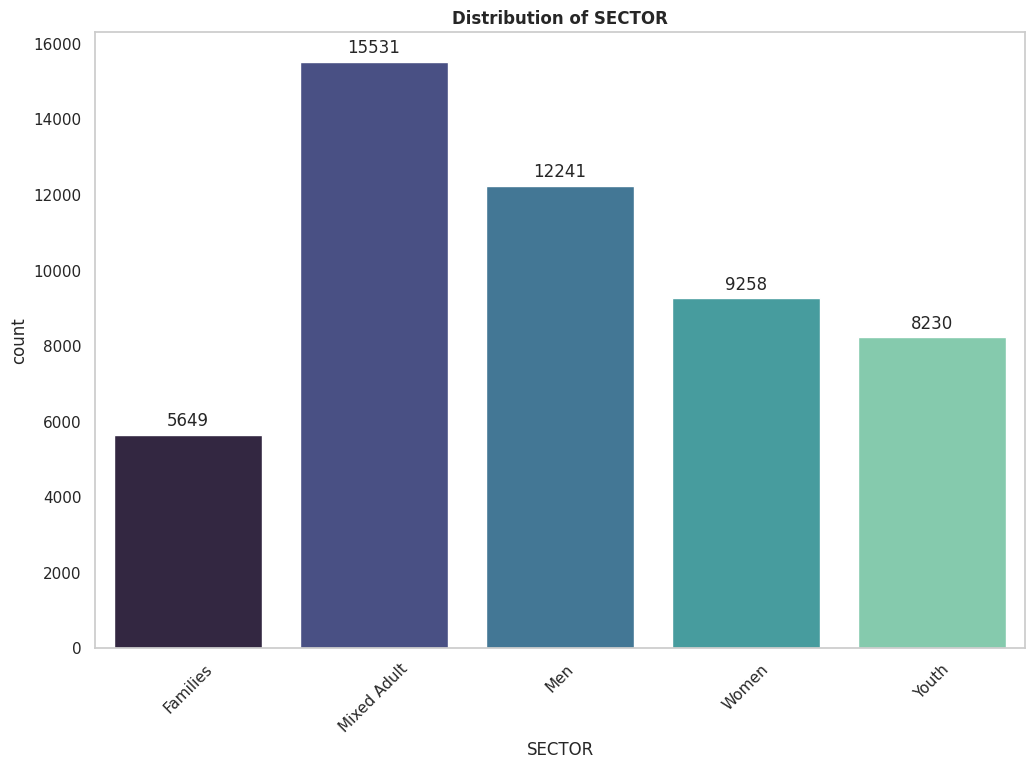

<ipython-input-10-f04ef8e01405>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x = var, palette='mako')


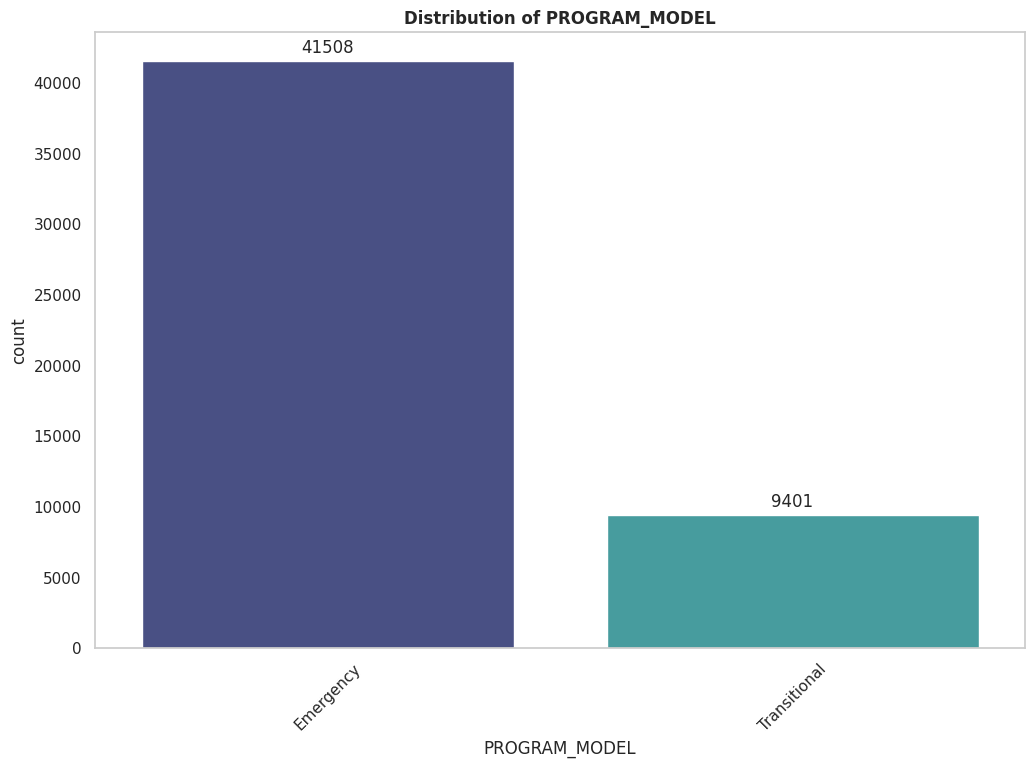

<ipython-input-10-f04ef8e01405>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x = var, palette='mako')


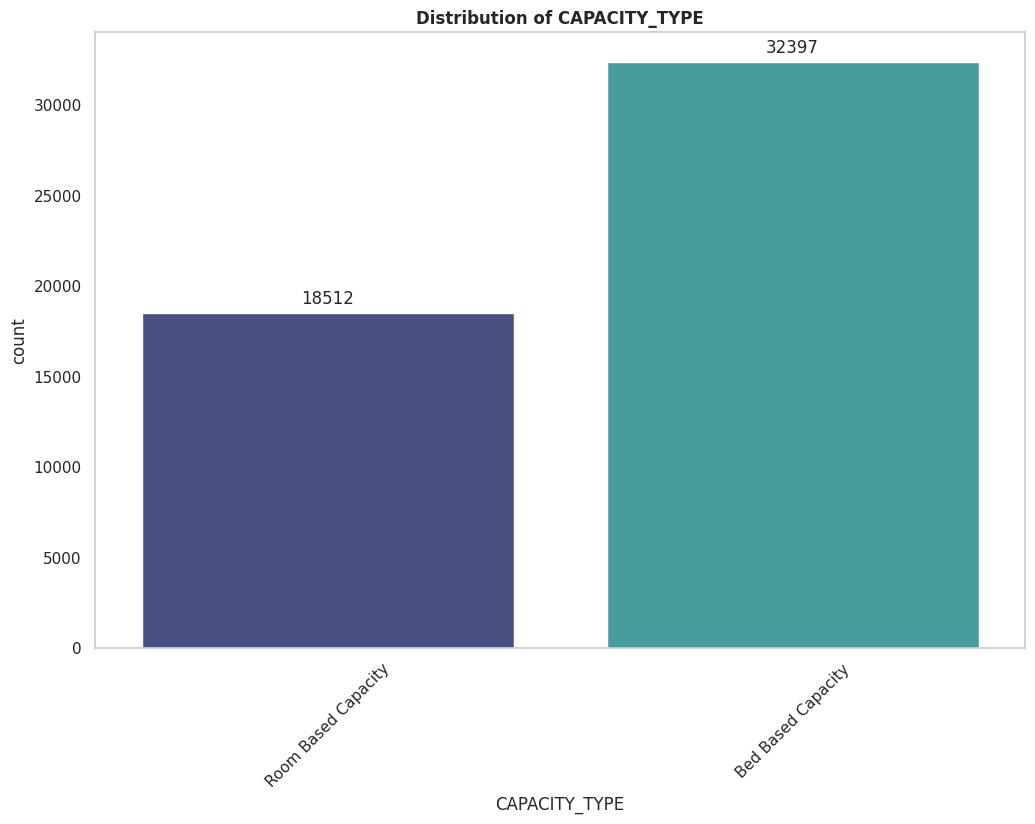

In [10]:
# Apply univariate graphical analysis for key categorical varibles
#Create a function for the plotting the results.
def categorical_var(data, var):
  plt.figure(figsize = (12,8)) # Figure size
  sns.set_style("whitegrid") # Set the grid to white
  ax = sns.countplot(data=data, x = var, palette='mako')
  plt.title(f'Distribution of {var}', fontweight='bold')
  plt.xticks(rotation=45)

  # Display the values on top of the bar
  for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

  #Remove the grids
  ax.xaxis.grid(False)
  ax.yaxis.grid(False)

  plt.show()

categorical_var(data,'SECTOR')
categorical_var(data,'PROGRAM_MODEL')
categorical_var(data,'CAPACITY_TYPE')

# **Findings 1:**
Univariate graphical analysis has been employed to explore sector, program model, and capacity type. The majority of the organization offer the services for the mixed adults, i.e. co-ed or all gender, followed by men, women, youth, and the lowest number is for families. Furthermore, the emergency programs substantially prevail transitional programs, and the number of the programs that offer bed based capacity is almost twice as high as room based capacity.

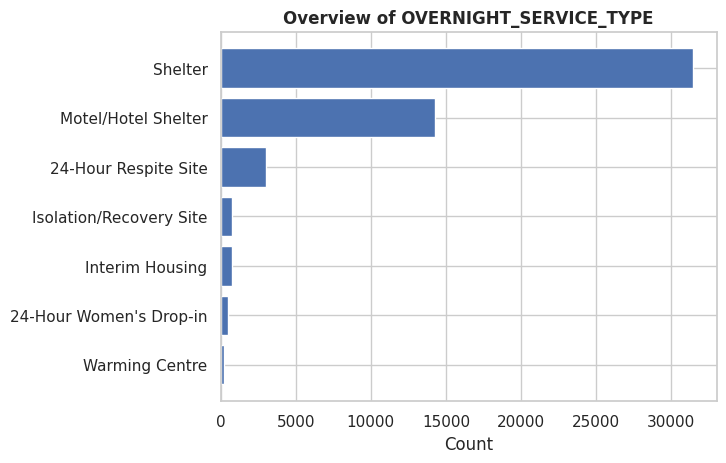

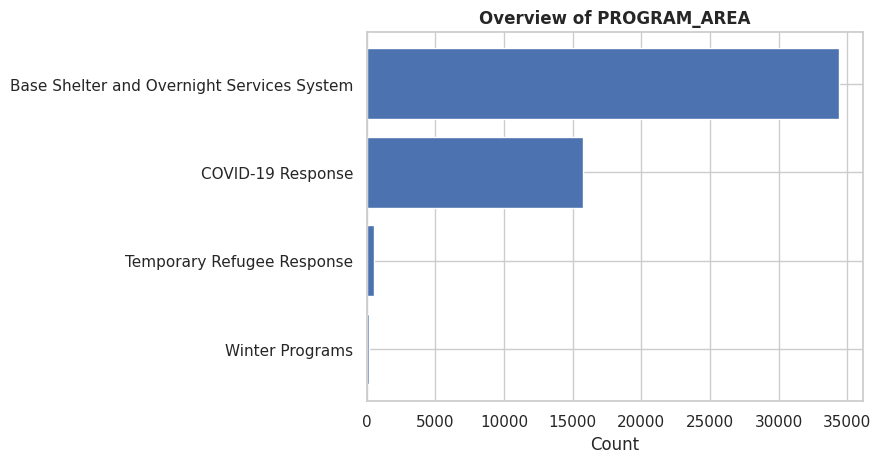

In [11]:
# Create a horizontal bar chart to explore overnighet service type and program area
def categorical_hvar(data, hvar):
    counts = data[hvar].value_counts()
    sns.set_style("whitegrid")
    counts = counts.sort_values(ascending=True)
    plt.barh(counts.index, counts.values)
    plt.xlabel('Count')
    plt.title(f'Overview of {hvar}', fontweight = 'bold')

    plt.show()

# Visualize horizontal bar plots for different categorical variables
categorical_hvar(data, 'OVERNIGHT_SERVICE_TYPE')
categorical_hvar(data, 'PROGRAM_AREA')


#### **Findings 2:**

Univariate graphical analysis has been employed to identify the utilization of the overnight service type and program area. Based on the analysis, majority of the overnight services are sheler based followed by motel/hotel shelter, program area are mostly base shelter and overnight services system.

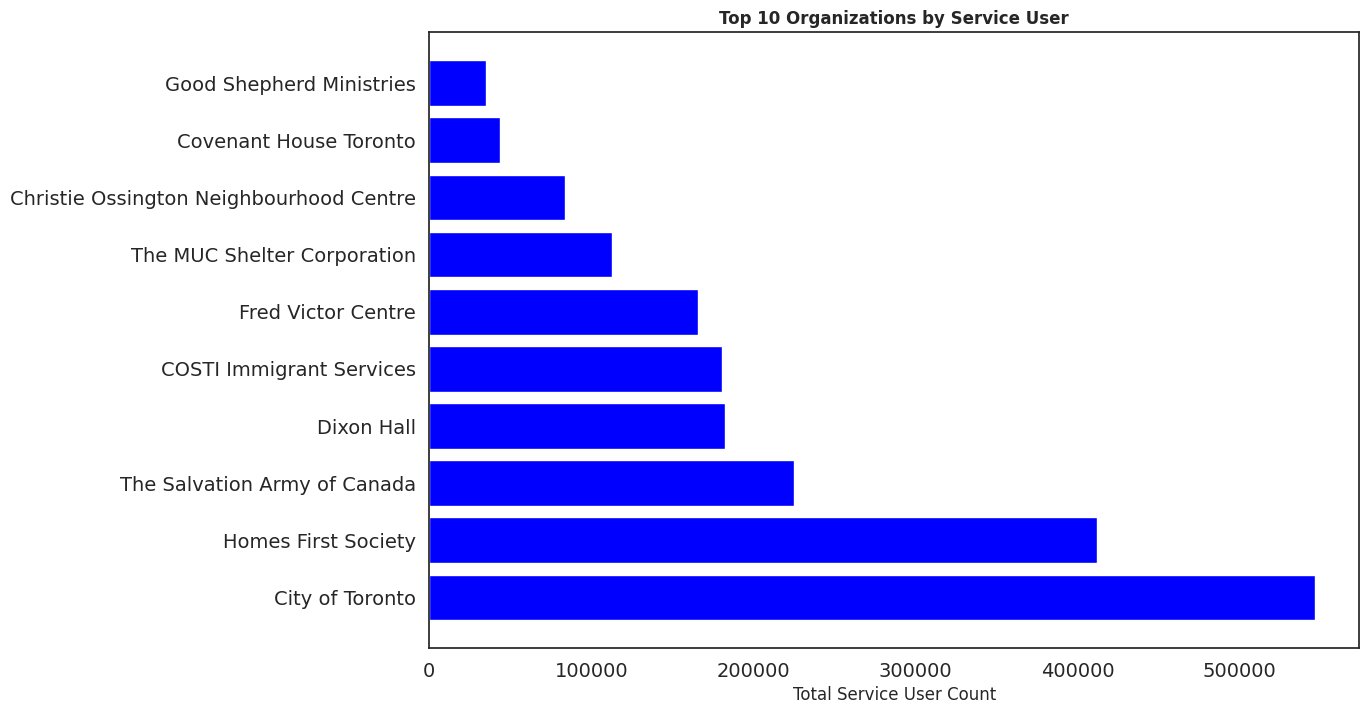

Index(['City of Toronto', 'Homes First Society',
       'The Salvation Army of Canada', 'Dixon Hall',
       'COSTI Immigrant Services', 'Fred Victor Centre',
       'The MUC Shelter Corporation',
       'Christie Ossington Neighbourhood Centre', 'Covenant House Toronto',
       'Good Shepherd Ministries'],
      dtype='object', name='ORGANIZATION_NAME')


In [12]:
# Analysis around successful organizations and their programs
# In this context the success is defined based on the number of individuals served

# Create a function to identify top 10 organizations
def top_organizations_by_service_count(data, hvar_org, top_n=10):

    # Group by organization and calculate the total service user count
    org_counts = data.groupby(hvar_org)['SERVICE_USER_COUNT'].sum()

    # Sort the organizations based on service user count
    org_counts_sorted = org_counts.sort_values(ascending=False).head(top_n)

    # Plot horizontal bar chart
    plt.figure(figsize = (12,8))
    sns.set_style("white")
    ax = plt.barh(org_counts_sorted.index, org_counts_sorted.values, color='Blue')
    plt.xlabel('Total Service User Count')
    plt.title(f'Top {top_n} Organizations by Service User', fontweight = 'bold')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.show()

    return org_counts_sorted.index

top_organizations=top_organizations_by_service_count(data, 'ORGANIZATION_NAME', top_n=10)

# Display the result
print(top_organizations)



In [ ]:
# Calculate the percentage of people this organizations served from total

def calculate_percent_service(data, top_n=10):

    # Group by organization
    org_counts = data.groupby('ORGANIZATION_NAME')['SERVICE_USER_COUNT'].sum()

    # Sort the organizations based on service users
    org_sort = org_counts.sort_values(ascending=False)

    # Calculate the sum of service users for the top organizations
    top_services = org_sort.head(top_n).sum()

    # Calculate the total service user count
    total_service = data['SERVICE_USER_COUNT'].sum()

    # Calculate the percentage of service provided by the top N organizations
    percent_service = top_services * 100 / total_service

    print(f'Top {top_n} organizations provide services to {round(percent_service)}% of homeless people in Toronto city')


calculate_percent_service(data, top_n=10)


Top 10 organizations provide services to 85% of homeless people in Toronto city


<ipython-input-13-896f8afa89f1>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SERVICE_USER_COUNT', y='PROGRAM_NAME', data=top_five_data, palette='viridis')


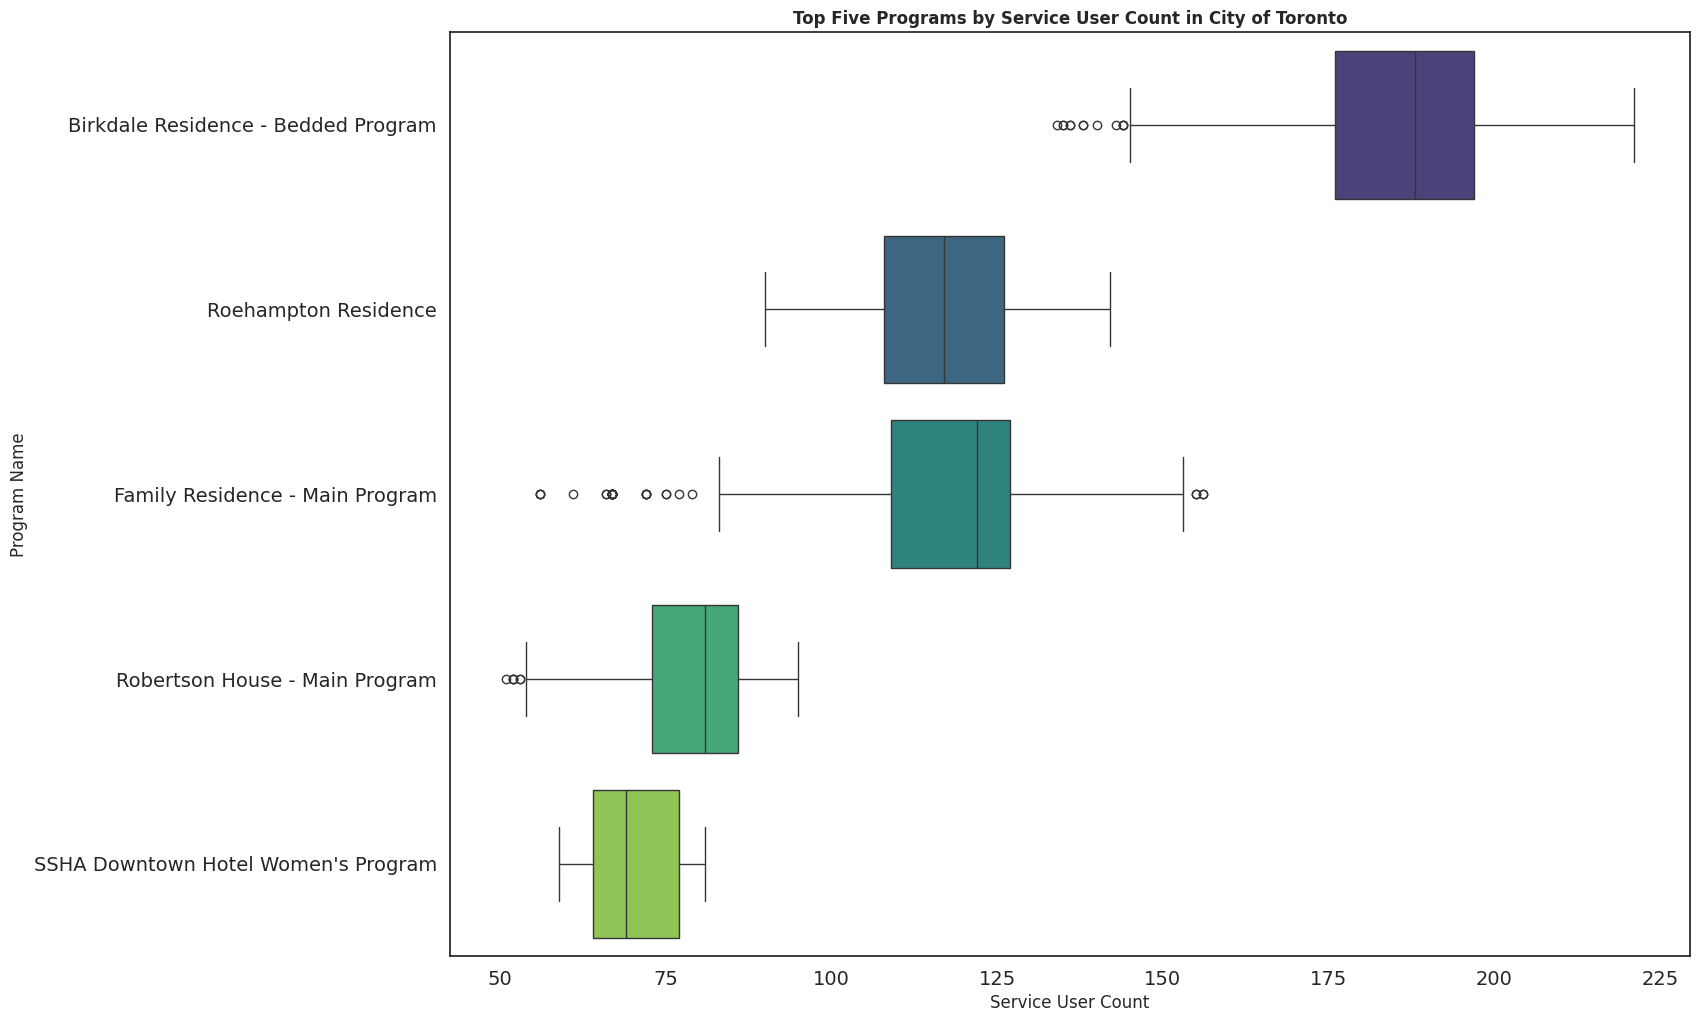

In [13]:
# City of Toronto is leading in the number of people served.
# Identify which is the most sucessful programs in the City of Toronto

# Filter data for 'City of Toronto'
city_of_toronto_data = data[data['ORGANIZATION_NAME'] == 'City of Toronto']

# Identify the top five programs
top_five_programs = city_of_toronto_data.groupby('PROGRAM_NAME')['SERVICE_USER_COUNT'].sum().nlargest(5).index

# Filter data for the top five programs
top_five_data = city_of_toronto_data[city_of_toronto_data['PROGRAM_NAME'].isin(top_five_programs)]

# Plot the boxplot
plt.figure(figsize=(16, 12))
sns.boxplot(x='SERVICE_USER_COUNT', y='PROGRAM_NAME', data=top_five_data, palette='viridis')
plt.title('Top Five Programs by Service User Count in City of Toronto', fontweight='bold')
plt.xlabel('Service User Count')
plt.ylabel('Program Name')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()


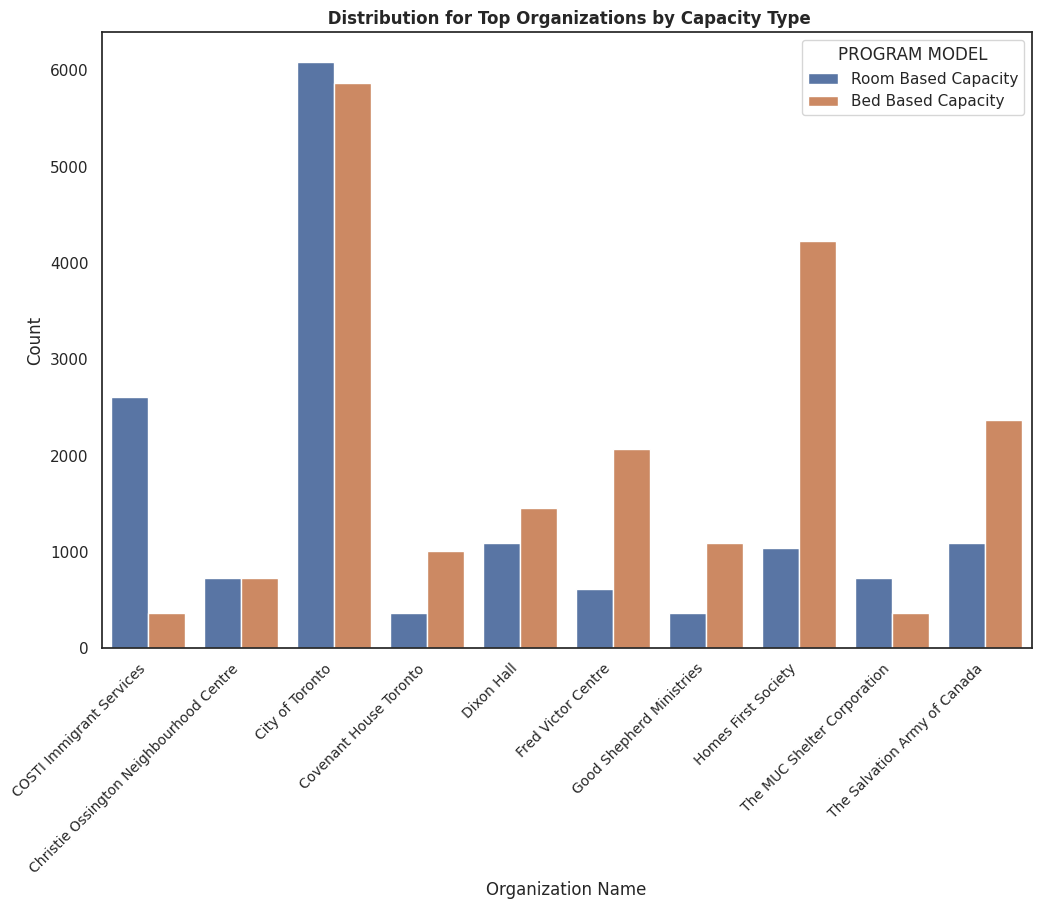

In [14]:
# Vizualize the capacity type fy the top organizations

data_top_orgs = data[data['ORGANIZATION_NAME'].isin(top_organizations)]

# Create a countplot for PROGRAM MODEL based on the top organizations
plt.figure(figsize=(12, 8))
sns.set_style("white")
sns.countplot(x='ORGANIZATION_NAME', hue='CAPACITY_TYPE',data=data_top_orgs, palette='deep')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Organization Name')
plt.ylabel('Count')
plt.title(' Distribution for Top Organizations by Capacity Type', fontweight = 'bold')
plt.legend(title='PROGRAM MODEL')
plt.xticks(fontsize=10)

plt.show()


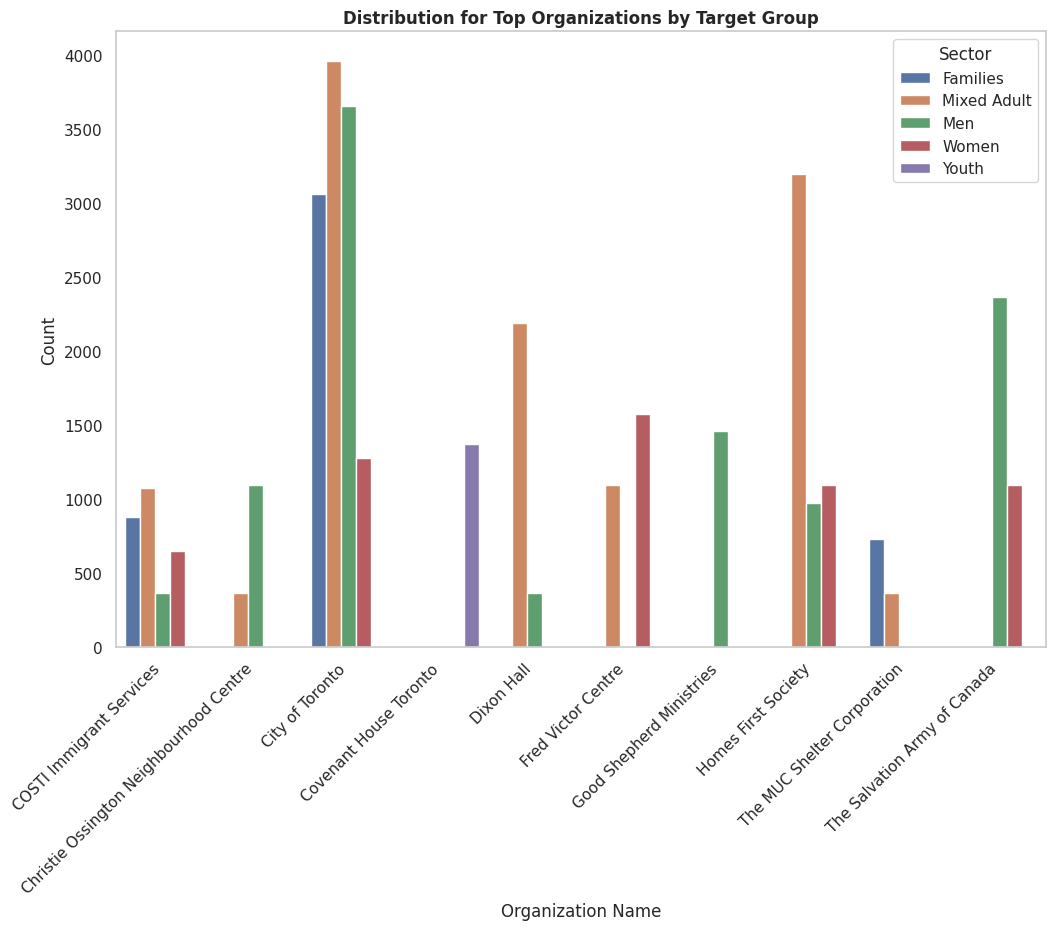

In [15]:
# Vizualize the support of top organizations in responding to the need of target group, i.e. sector
data_top_orgs = data[data['ORGANIZATION_NAME'].isin(top_organizations)]

# Create a countplot for PROGRAM MODEL based on the top organizations
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax = sns.countplot(x='ORGANIZATION_NAME', hue='SECTOR',data=data_top_orgs, palette='deep')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Organization Name')
plt.ylabel('Count')
plt.title('Distribution for Top Organizations by Target Group', fontweight='bold')
plt.legend(title='Sector')
ax.xaxis.grid(False)
ax.yaxis.grid(False)
plt.show()

### **Finding 3:**

Graphical and non graphical analysis have been utilized to explore the top 10 organizations that provide the support to the majority of the homeless people.

According to the analyis, top 10 organization provide support to the 85% of the clients, with the top 3 organization being City of Toronto, Homes First Society, and the Salvation Army of Canada.

Upon identifying  City of Toronto in leading for the services further analyis has been conducted to identify the successful program. Based on the boxplot, Birkdale Residence Bedded Program, Family Residence - Main Program, and SSHA Dowtown Women Program are championing by the number of services provided.

70% of organizations are bed based with the expection of COSTI Immigrant Services, City of Toronto, and MUC Shelter Corporation, where the room based capacity prevails. 80% of the organizations are providing emergency services, with the expection of MUC Shelter Corporation, where the transitional program prevails, and Good Shephard Ministies, with the equal capacity for the emergency and transitional program.
Majority of the services are provided to the mixed adults, while few organization are specialized on certain groups. For example, Covenant House Toronto provide services to the youth, Good Shephard Ministries are providing the services to men.



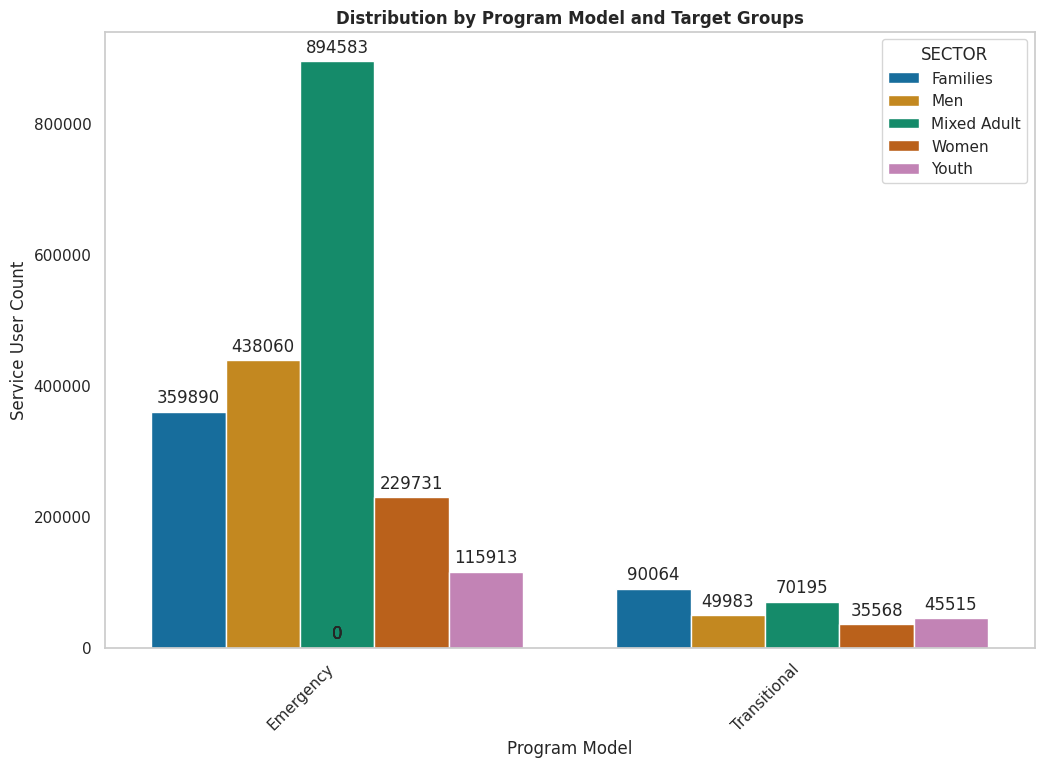

In [ ]:
#Vizualize the program model by servicng the target groups

# Group by 'PROGRAM_MODEL' and calculate the sum of 'SERVICE_USER_COUNT' for each 'SECTOR'
sector_counts = data.groupby(['PROGRAM_MODEL', 'SECTOR'])['SERVICE_USER_COUNT'].sum().reset_index()

# Plotting the countplot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='PROGRAM_MODEL', y='SERVICE_USER_COUNT', hue='SECTOR', data=sector_counts, palette='colorblind')
plt.xticks(rotation=45, ha='right')

# Name the axis, title, and legend
plt.xlabel('Program Model')
plt.ylabel('Service User Count')
plt.title('Distribution by Program Model and Target Groups', fontweight='bold')
plt.legend(title='SECTOR')

# Display the values on top of the bar
for p in ax.patches:
  ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

#Remove the grids
ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.show()


#### **Finding 4**:

Multivariate grahical analysis has been used to identify the program models by category of homeless shelters. Based on findings, the emergency programs are substantially prevails transitional ones.



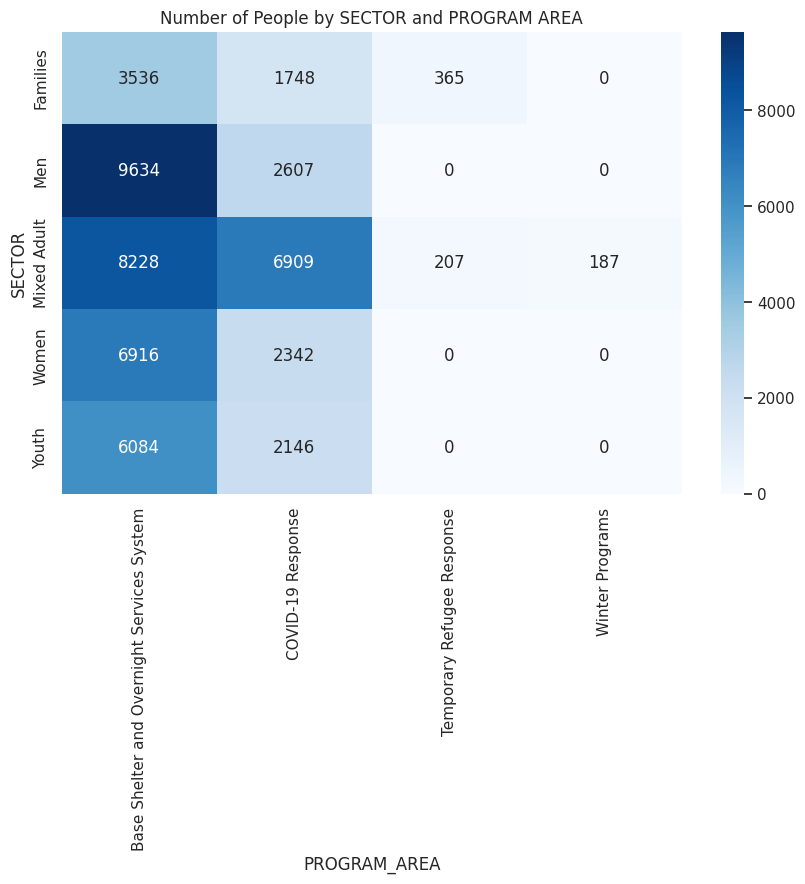

In [ ]:
# Explore with the heatmap for further analysis
sector_area_tab = pd.crosstab(data['SECTOR'], data['PROGRAM_AREA'])
plt.figure(figsize=(10, 6))
sns.heatmap(sector_area_tab, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Number of People by SECTOR and PROGRAM AREA')
plt.show()

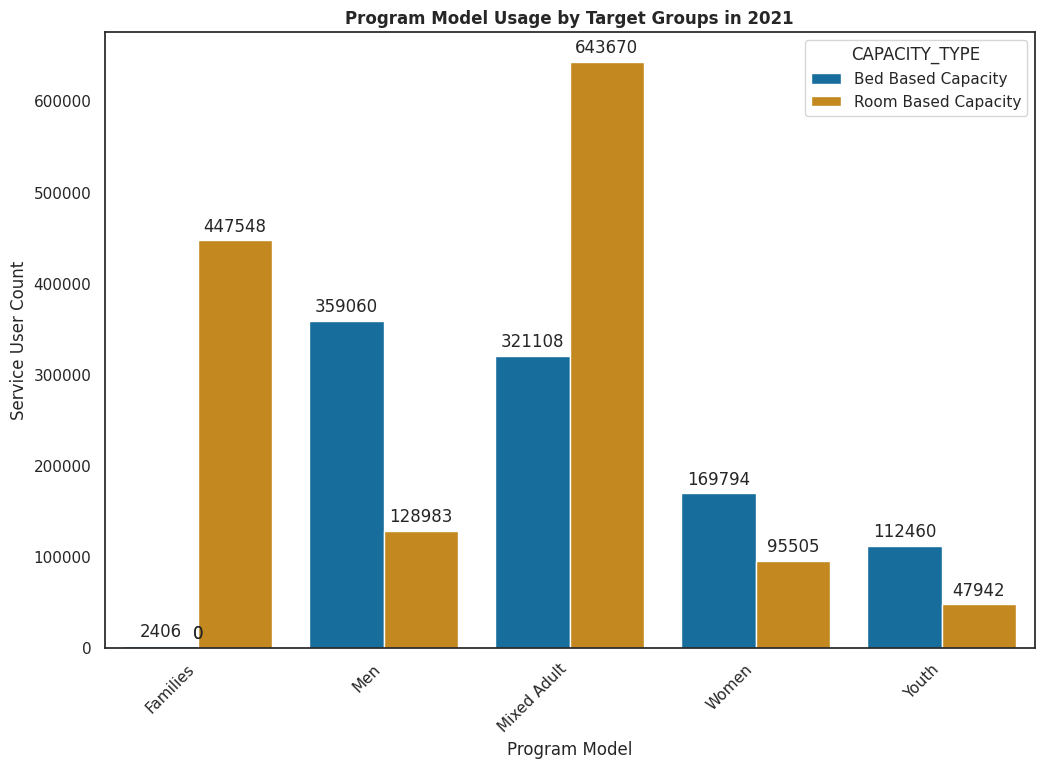

In [ ]:
# Vizualize sector, capacity type by service users

# Group by sector and capacity type
sector_counts = data.groupby(['SECTOR', 'CAPACITY_TYPE'])['SERVICE_USER_COUNT'].sum().reset_index()

# Plotting the bar chart
plt.figure(figsize=(12, 8))
sns.set_style("white")
ax = sns.barplot(x='SECTOR', y='SERVICE_USER_COUNT', hue='CAPACITY_TYPE', data=sector_counts, palette='colorblind')
plt.xticks(rotation=45, ha='right')

# Labels
plt.xlabel('Sector')
plt.ylabel('Service User Count')
plt.title('Service User Count by Sector and Capacity Type in 2021', fontweight='bold')
plt.legend(title='CAPACITY_TYPE')

# Add values on top of the bar charts
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)
plt.show()



In [ ]:
# Calculate the value and percentage to back up the vizualization above

# Group by 'SECTOR' and 'CAPACITY_TYPE'
sector_counts = data.groupby(['SECTOR', 'CAPACITY_TYPE'])['SERVICE_USER_COUNT'].sum().reset_index()

# Calculate the total sum
total_sum = sector_counts['SERVICE_USER_COUNT'].sum()

# Calculate the total sum for each 'SECTOR'
sector_total_sum = sector_counts.groupby('SECTOR')['SERVICE_USER_COUNT'].transform('sum')

# Add a new column for the percentage based on the total sum
sector_counts['Percentage_Total'] = round((sector_counts['SERVICE_USER_COUNT'] / total_sum) * 100)
sector_counts['Percentage_INGroup'] = round((sector_counts['SERVICE_USER_COUNT'] / sector_total_sum) * 100)

# Display the table using tabulate
table_str = tabulate(sector_counts, headers='keys', tablefmt='pretty')

print(table_str)


+---+-------------+---------------------+--------------------+------------------+--------------------+
|   |   SECTOR    |    CAPACITY_TYPE    | SERVICE_USER_COUNT | Percentage_Total | Percentage_INGroup |
+---+-------------+---------------------+--------------------+------------------+--------------------+
| 0 |  Families   | Bed Based Capacity  |        2406        |       0.0        |        1.0         |
| 1 |  Families   | Room Based Capacity |       447548       |       19.0       |        99.0        |
| 2 |     Men     | Bed Based Capacity  |       359060       |       15.0       |        74.0        |
| 3 |     Men     | Room Based Capacity |       128983       |       6.0        |        26.0        |
| 4 | Mixed Adult | Bed Based Capacity  |       321108       |       14.0       |        33.0        |
| 5 | Mixed Adult | Room Based Capacity |       643670       |       28.0       |        67.0        |
| 6 |    Women    | Bed Based Capacity  |       169794       |       7.0 

#### **Finding 5:**

Multivariate graphical and non graphical analysis has been used to explore the capacity type by the sector based on the service user count.

According to the table and bar plot, the majority of the services used are (28%) mixed adult room capacity, which is followed by the (19%) families room based capacity and 15% men bed based capacity.

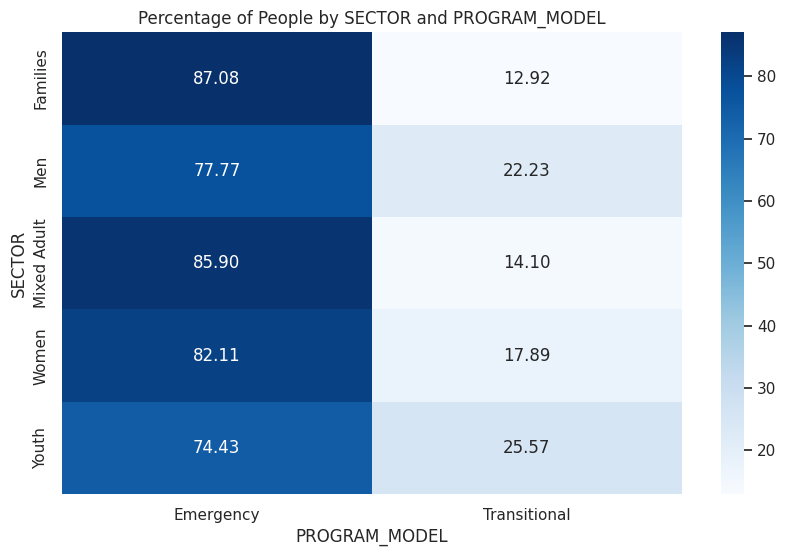

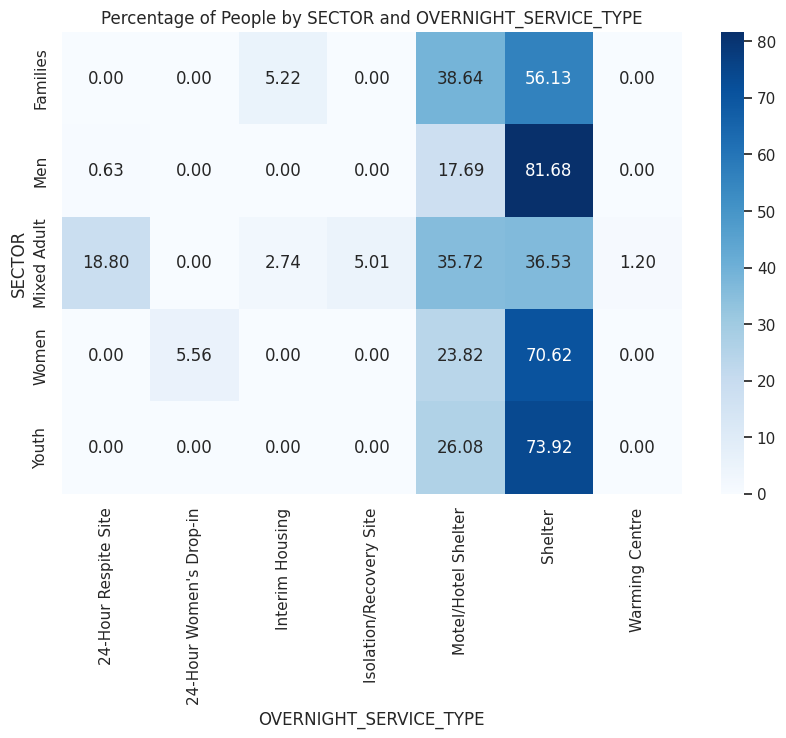

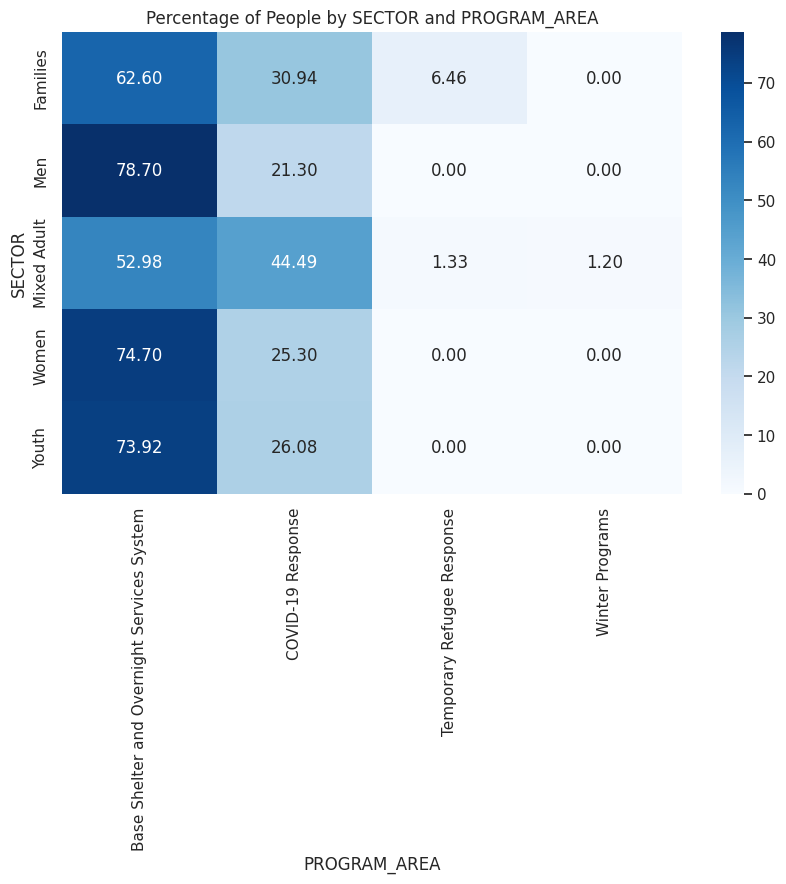

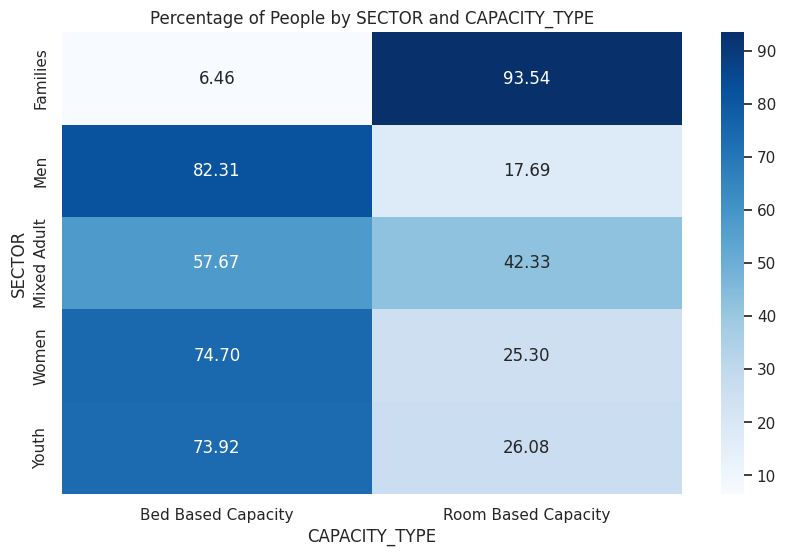

In [ ]:
# Combined cross tab with percentage value to make an initial exploration

# Create a function
def plot_crosstab_sector(data, variable1, variable2):

    # Create a crosstab
    crosstab_table = pd.crosstab(data[variable1], data[variable2])

    # Calculate row percentages
    row_percentages = crosstab_table.div(crosstab_table.sum(axis=1), axis=0) * 100

    plt.figure(figsize=(10, 6))

    # Use the row_percentages for annotation
    sns.heatmap(row_percentages, annot=True, fmt='.2f', cmap='Blues', cbar=True)

    plt.title(f'Percentage of People by {variable1} and {variable2}')
    plt.show()

# Display the values
plot_crosstab_sector(data, 'SECTOR', 'PROGRAM_MODEL')
plot_crosstab_sector(data, 'SECTOR', 'OVERNIGHT_SERVICE_TYPE')
plot_crosstab_sector(data, 'SECTOR', 'PROGRAM_AREA')
plot_crosstab_sector(data, 'SECTOR', 'CAPACITY_TYPE') # cluster plot


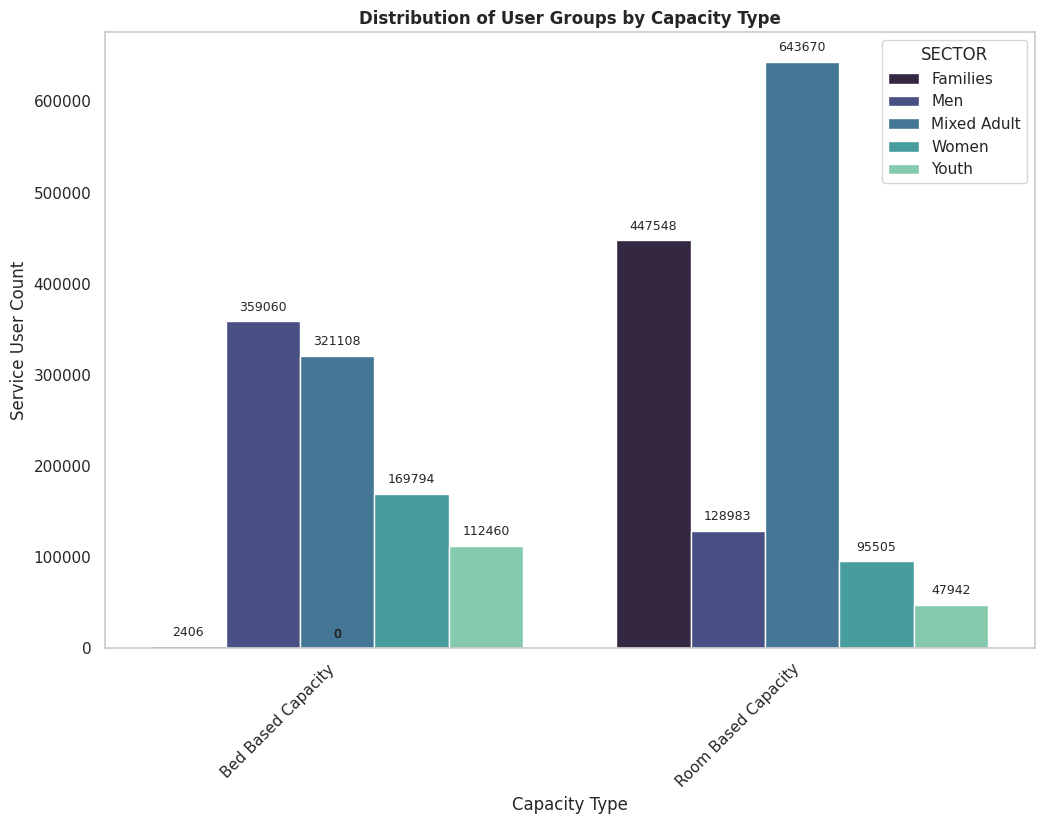

In [ ]:
# Group by  and calculate the sum of service users
sector_counts = data.groupby(['CAPACITY_TYPE', 'SECTOR'])['SERVICE_USER_COUNT'].sum().reset_index()

# Plotting the countplot
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax = sns.barplot(x='CAPACITY_TYPE', y='SERVICE_USER_COUNT', hue='SECTOR', data=sector_counts, palette='mako')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Capacity Type')
plt.ylabel('Service User Count')
plt.title('Distribution of User Groups by Capacity Type', fontweight='bold')
plt.legend(title='SECTOR')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=9)

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.show()

#### **Finding 6:**

Multivariate grapical analysis has been employed to determine the number of various service users based on the capacity.

The bed based capacity are prevail by men followed by mixed adults, and women. In contrast, room based capacity are primarily used by mixed adults, followed by families.

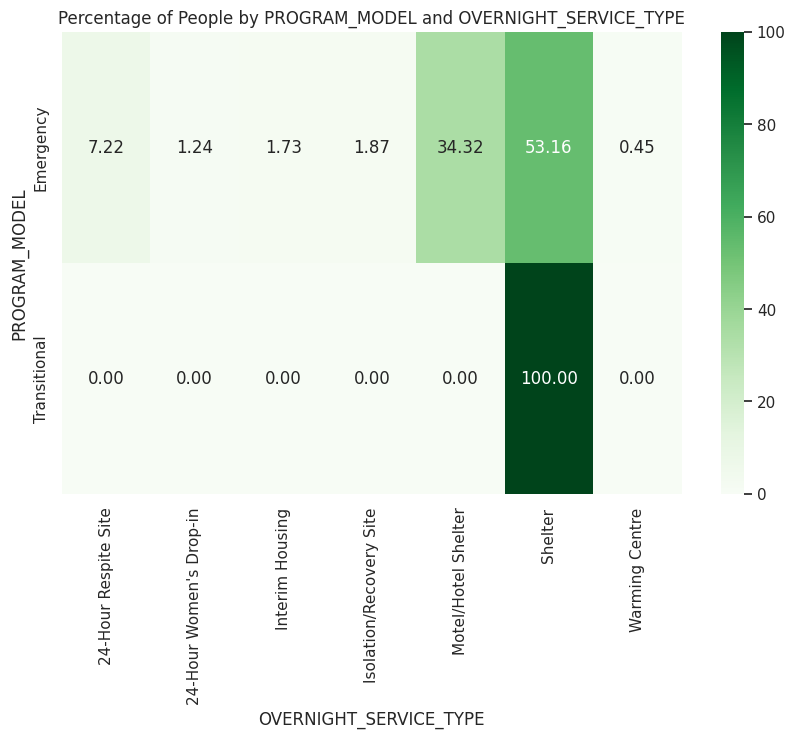

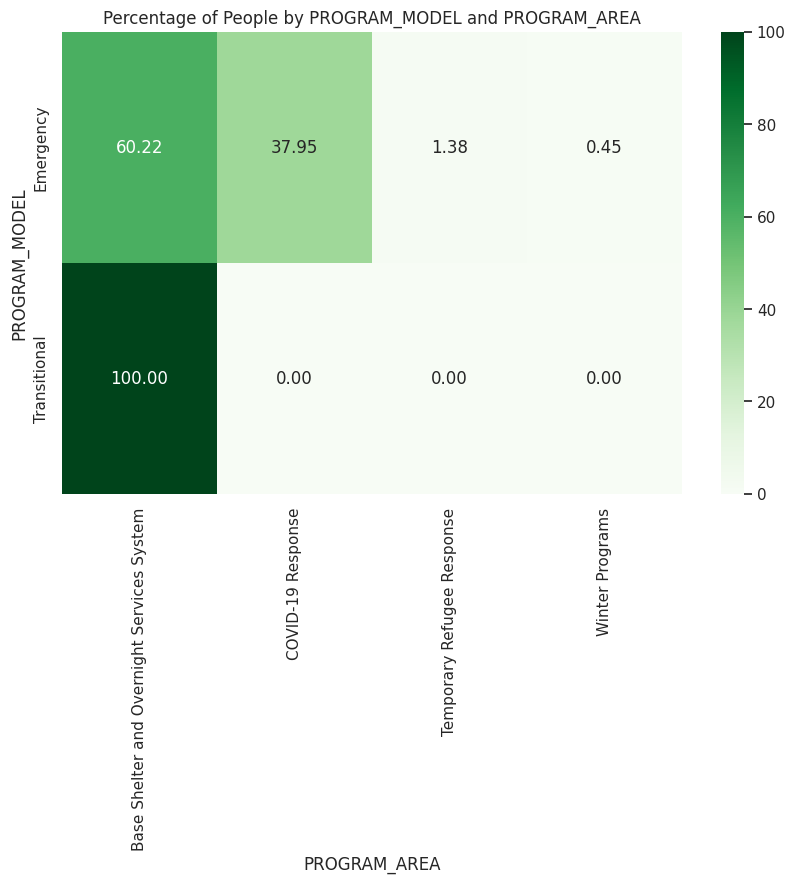

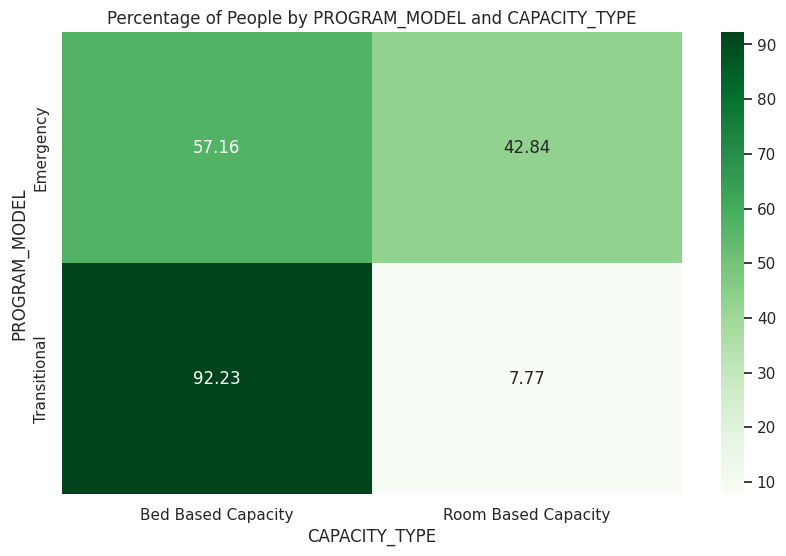

In [ ]:
# Make initial exploration of categorical variables with the heatmap

# Create a function
def plot_crosstab_model(data, variable1, variable2):

    # Create a crosstab
    crosstab_table = pd.crosstab(data[variable1], data[variable2])

    # Calculate row percentages
    row_percentages = crosstab_table.div(crosstab_table.sum(axis=1), axis=0) * 100

    plt.figure(figsize=(10, 6))

    # Use the row_percentages for annotation
    sns.heatmap(row_percentages, annot=True, fmt='.2f', cmap='Greens', cbar=True)

    plt.title(f'Percentage of People by {variable1} and {variable2}')
    plt.show()

plot_crosstab_model(data, 'PROGRAM_MODEL', 'OVERNIGHT_SERVICE_TYPE')
plot_crosstab_model(data, 'PROGRAM_MODEL', 'PROGRAM_AREA')
plot_crosstab_model(data, 'PROGRAM_MODEL', 'CAPACITY_TYPE')

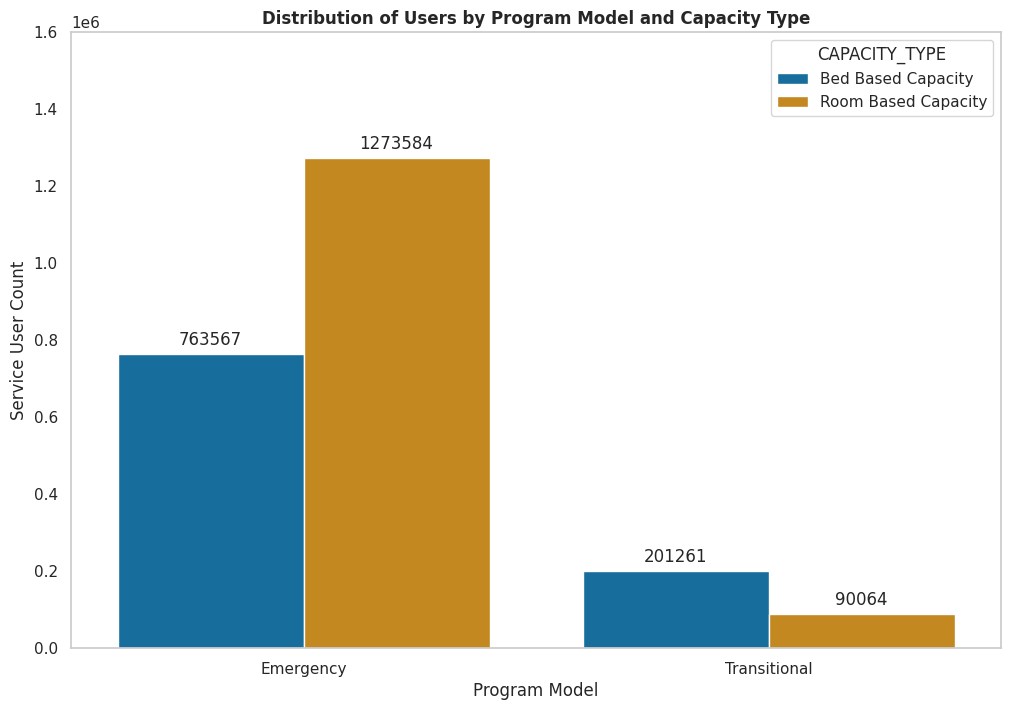

In [ ]:
# Explore the program model and capacity type further considering service users

grouped_data = data.groupby(['PROGRAM_MODEL', 'CAPACITY_TYPE'])['SERVICE_USER_COUNT'].sum().reset_index()

# Create a grouped bar chart
plt.figure(figsize = (12,8))
ax = sns.barplot(x='PROGRAM_MODEL', y='SERVICE_USER_COUNT', hue='CAPACITY_TYPE', data=grouped_data, palette='colorblind')
plt.xlabel('Program Model')
plt.ylabel('Service User Count')
plt.title('Distribution of Users by Program Model and Capacity Type', fontweight = 'bold')

# Set the scale
plt.ylim(0, 1600000)

# Values on the top of the bars
for p in ax.patches:
    if p.get_height() > 0:  # Filter out bars with zero height
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)
#Remove grids
ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.show()


In [ ]:
# Calculate to support the vizualization above
grouped_data = data.groupby(['PROGRAM_MODEL', 'CAPACITY_TYPE'])['SERVICE_USER_COUNT'].sum().reset_index()

# Pivot the DataFrame to create a matrix of 'COMBINED_CAPACITY' for each 'PROGRAM_MODEL' and 'CAPACITY_TYPE'
pivot_table_data = grouped_data.pivot_table(index='PROGRAM_MODEL', columns='CAPACITY_TYPE', values='SERVICE_USER_COUNT', aggfunc='sum')

# Display the table
print(pivot_table_data)


CAPACITY_TYPE  Bed Based Capacity  Room Based Capacity
PROGRAM_MODEL                                         
Emergency                  763567              1273584
Transitional               201261                90064


#### **Finding 7**:

The heatmap has been created to detect any significant difference by simple count of the values of categorical varibles and transforming them into percentages. Considering visible disparity between Program Model and Capacity Type it has been further explored.

For the further examination,  `SERVICE_USER_COUNT`varibale has been selected to explore beyond simple counting and look into the actual number of individuals occupied the units. Based on finding, the emergency room based are in a high demand.

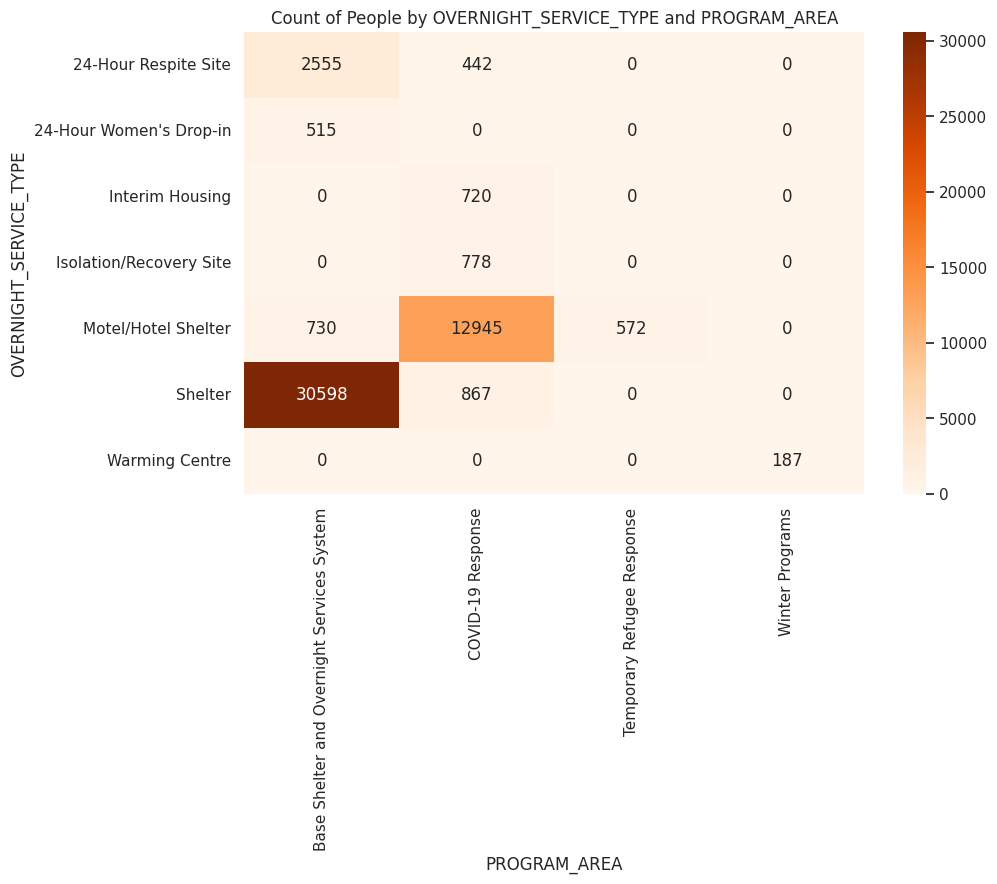

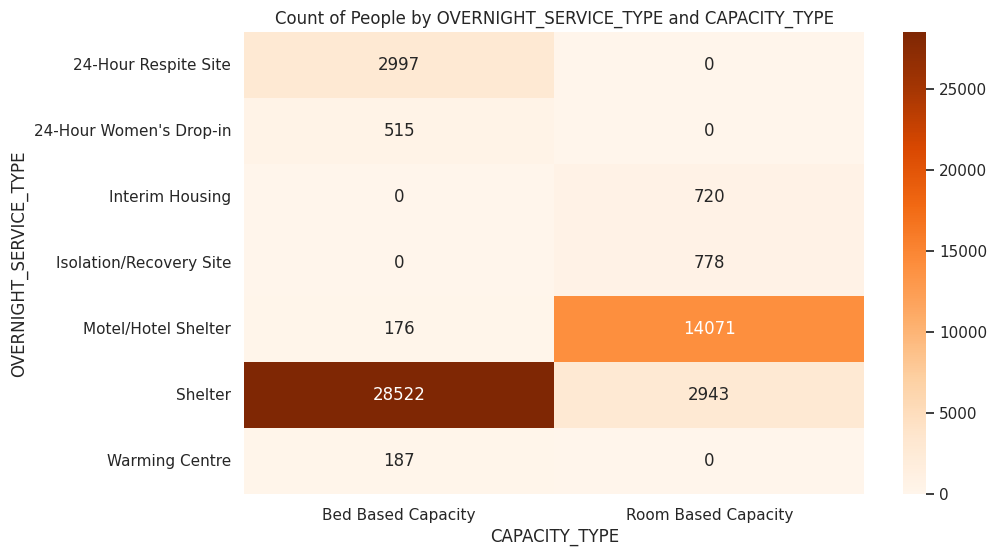

In [ ]:
# Create function with the heatmap for the nitial explorations

def plot_crosstab_service(data, variable1, variable2):

    # Create a crosstab
    crosstab_table = pd.crosstab(data[variable1], data[variable2])

    plt.figure(figsize=(10, 6))

    # Use the raw counts for annotation
    sns.heatmap(crosstab_table, annot=True, fmt='d', cmap='Oranges', cbar=True)

    plt.title(f'Count of People by {variable1} and {variable2}')
    plt.show()

plot_crosstab_service(data, 'OVERNIGHT_SERVICE_TYPE', 'PROGRAM_AREA')
plot_crosstab_service(data, 'OVERNIGHT_SERVICE_TYPE', 'CAPACITY_TYPE')


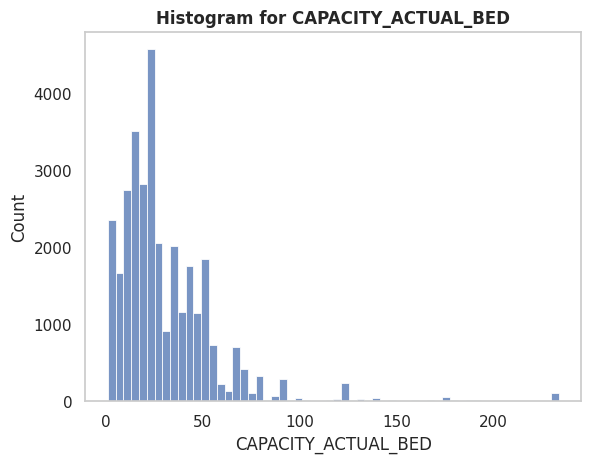

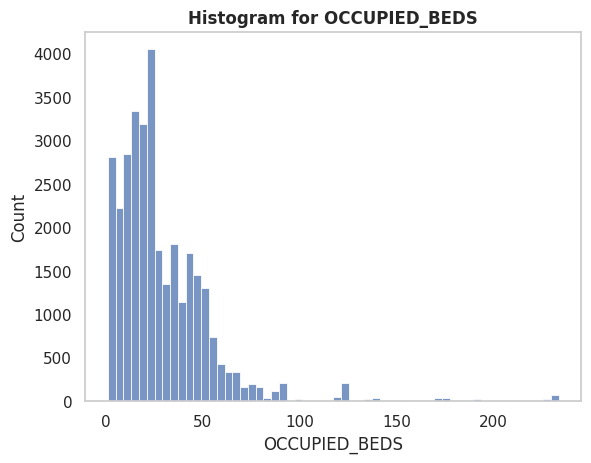

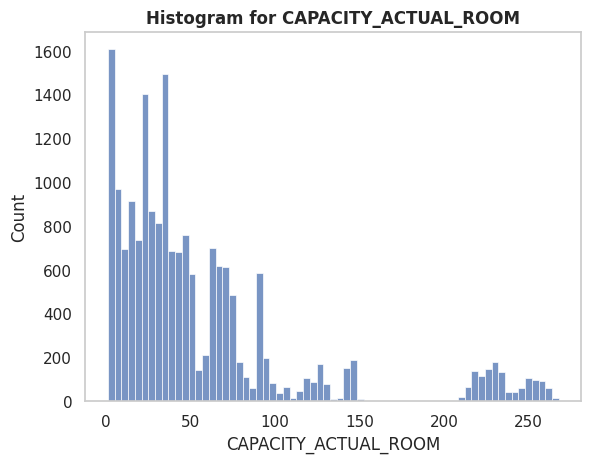

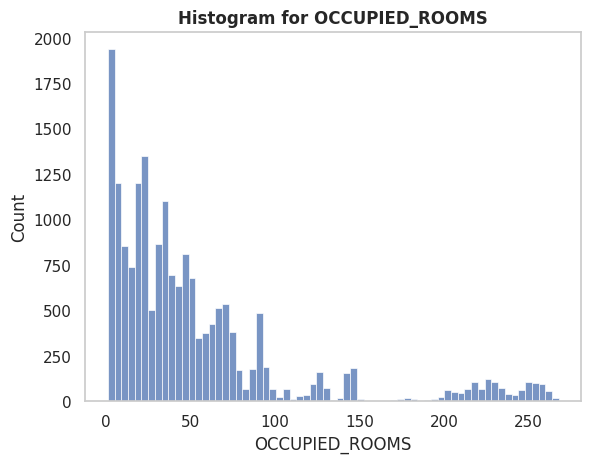

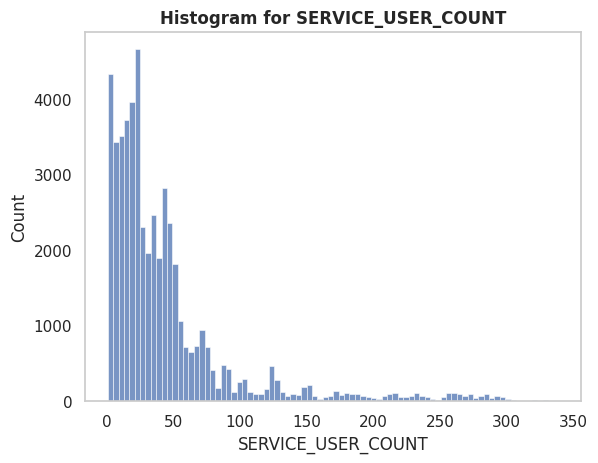

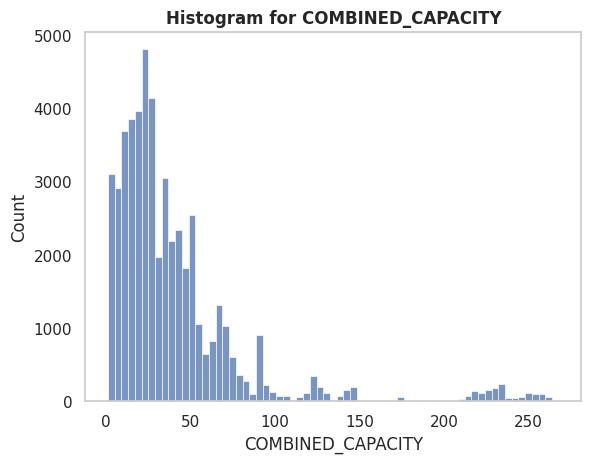

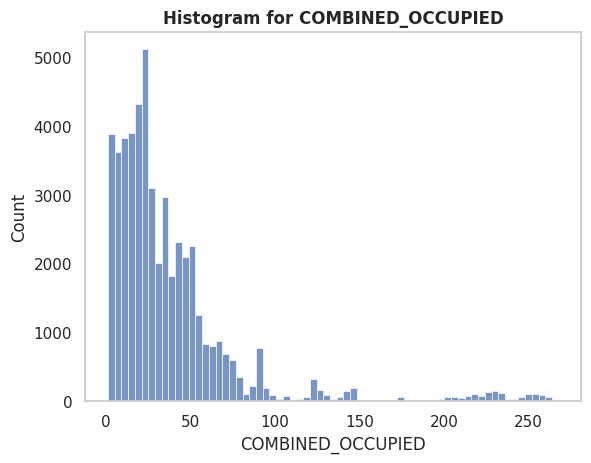

In [ ]:
# Create a histogram to check the distribution
def histplot(data, var_num):

  filtered_data=data[data[var_num] != 0] # Remove zero because the agency with room capacity does not count beds
  sns.set_style("whitegrid")

  ax = sns.histplot(data=filtered_data, x=var_num, binwidth = 4)
  ax.xaxis.grid(False)
  ax.yaxis.grid(False)
  plt.title(f'Histogram for {var_num}', fontweight = 'bold')
  plt.show()

# Print the values
histplot(data,'CAPACITY_ACTUAL_BED')
histplot(data,'OCCUPIED_BEDS')
histplot(data,'CAPACITY_ACTUAL_ROOM')
histplot(data,'OCCUPIED_ROOMS')
histplot(data,'SERVICE_USER_COUNT')
histplot(data,'COMBINED_CAPACITY')
histplot(data,'COMBINED_OCCUPIED')


#### **Finding 8:**

Univariate graphical analysis has been appliyed to examine numberical variables in the dataset.

The data for each of the variable has been significantly right skewed. In this regard the these variables are violating the assumption of the t-test and increasing the likelihood of the Type 1 error. To this end, the non-parametric t-test will be used in the further analysis.

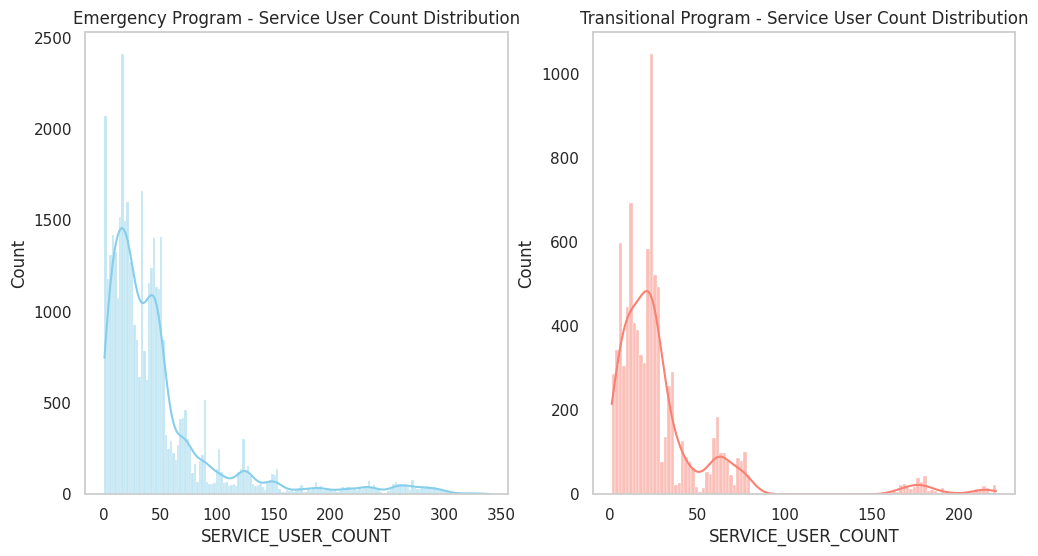

In [ ]:
# Check the distributions by the program model

# Filter data for Emergency and Transitional programs
emergency_data = data[data['PROGRAM_MODEL'] == 'Emergency']
transitional_data = data[data['PROGRAM_MODEL'] == 'Transitional']

# Set up the figure
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Plot histogram for Emergency program
plt.subplot(1, 2, 1)
ax = sns.histplot(emergency_data['SERVICE_USER_COUNT'], kde=True, color='skyblue')
ax.xaxis.grid(False)
ax.yaxis.grid(False)
plt.title('Emergency Program - Service User Count Distribution')

# Plot histogram for Transitional program
plt.subplot(1, 2, 2)
ax = sns.histplot(transitional_data['SERVICE_USER_COUNT'], kde=True, color='salmon')
ax.xaxis.grid(False)
ax.yaxis.grid(False)
plt.title('Transitional Program - Service User Count Distribution')

plt.show()


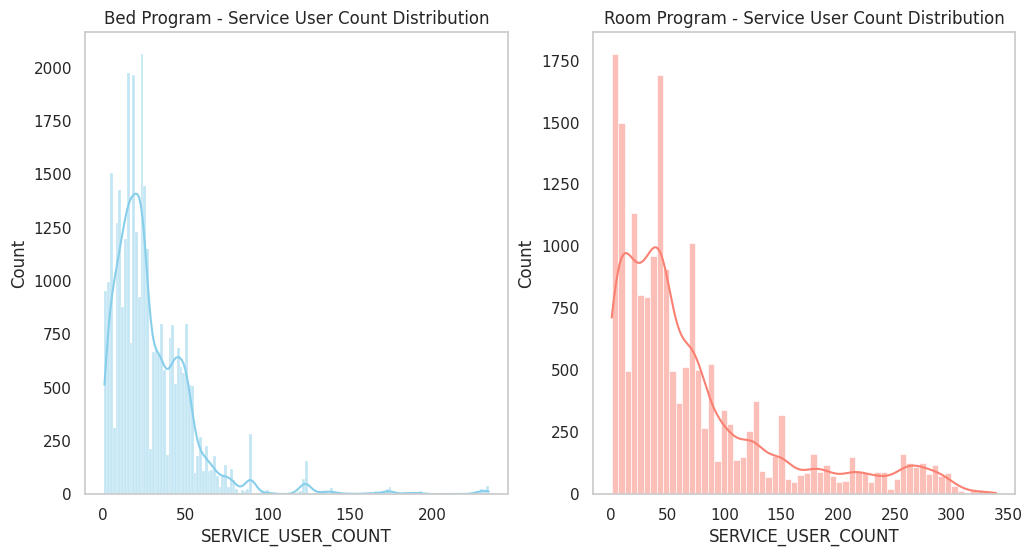

In [ ]:
# Check the distributions by the program model

# Filter data for bed and Room programs
bed_data = data[data['CAPACITY_TYPE'] == 'Bed Based Capacity']
room_data = data[data['CAPACITY_TYPE'] == 'Room Based Capacity']

# Set up the figure
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Plot histogram for bed program
plt.subplot(1, 2, 1)
ax = sns.histplot(bed_data['SERVICE_USER_COUNT'], kde=True, color='skyblue')
ax.xaxis.grid(False)
ax.yaxis.grid(False)
plt.title('Bed Program - Service User Count Distribution')

# Plot histogram for Room program
plt.subplot(1, 2, 2)
ax = sns.histplot(room_data['SERVICE_USER_COUNT'], kde=True, color='salmon')
ax.xaxis.grid(False)
ax.yaxis.grid(False)
plt.title('Room Program - Service User Count Distribution')

plt.show()

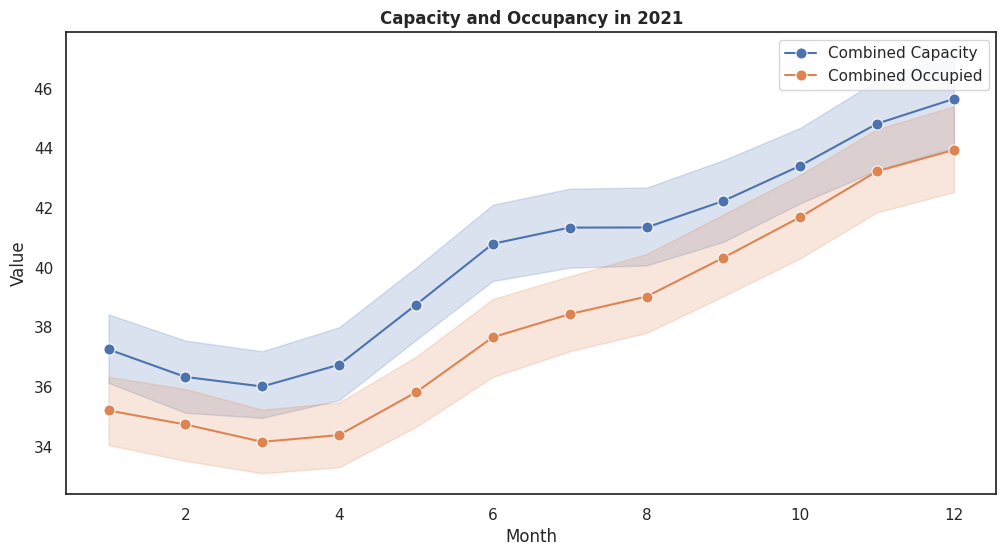

In [ ]:
# Explore the capacity and occupancy change based on the monthly data
# thought the function

def time_change_combined(data):
    # Remove zero because the agency with room capacity does not count beds
    filtered_data = data[(data['COMBINED_CAPACITY'] != 0) & (data['COMBINED_OCCUPIED'] != 0)]

    # Create a lineplot for both variables over time by month
    plt.figure(figsize=(12, 6))
    sns.set_style("white")
    sns.lineplot(data=filtered_data, x="MONTH", y="COMBINED_CAPACITY", marker="o", markersize=8, label="Combined Capacity")
    sns.lineplot(data=filtered_data, x="MONTH", y="COMBINED_OCCUPIED", marker="o", markersize=8, label="Combined Occupied")

    # Label Data
    plt.xlabel('Month')
    plt.ylabel('Value')
    plt.title('Capacity and Occupancy in 2021', fontweight = 'bold')
    plt.legend()

    plt.show()

# Visualize time change for both variables on the same chart
time_change_combined(data)


In [ ]:
# Make calculations to support findings

difference = data['COMBINED_CAPACITY'] - data['COMBINED_OCCUPIED']

# Create a new DataFrame with the difference and month
result_df = pd.DataFrame({'MONTH': data['MONTH'], 'Difference': difference})

# Group by month and sum the differences
grouped_result = result_df.groupby('MONTH')['Difference'].sum()

# Display the result
print(grouped_result)


MONTH
1      9028.0
2      6499.0
3      8410.0
4      9975.0
5     12764.0
6     13039.0
7     12520.0
8      9962.0
9      7769.0
10     7223.0
11     6479.0
12     7139.0
Name: Difference, dtype: float64


In [ ]:
# Calculate the percentage

difference = data['COMBINED_CAPACITY'] - data['COMBINED_OCCUPIED']
percent_difference = difference*100/data['COMBINED_CAPACITY']

# Create a new DataFrame with the difference and month
result_df = pd.DataFrame({'MONTH': data['MONTH'], 'Difference': difference, 'Capacity': data['COMBINED_CAPACITY'] })

# Group by month and sum the differences
grouped_result_difference = result_df.groupby('MONTH')['Difference'].sum()
grouped_result_capacity = result_df.groupby('MONTH')['Capacity'].sum()
grouped_result_percent = grouped_result_difference*100/grouped_result_capacity


# Display the result
print(round(grouped_result_percent, 1))



MONTH
1     5.5
2     4.4
3     5.1
4     6.4
5     7.6
6     7.7
7     7.0
8     5.6
9     4.5
10    4.0
11    3.6
12    3.7
dtype: float64


### **Finding 9:**
Graphical and non grapical multivariate analysis has been employed to identify to what extend the capacity of the organizations is unilized.

Based on the findings, the capacity of the organizations are not completely utilized as on average 5% of the spaces (beds or rooms) are not filled. The highest unutilized capacity is observed in June with unutilized 7.7% of the capacity and the lowest is in November with 3.6% untilized capacity.

In [ ]:
# Calculate and hightlight key descriptives for capacity, occupancy, and service users

def calculate_combined_statistics(data):

    # Calculate statistics for COMBINED_CAPACITY
    combined_capacity = pd.DataFrame({
        'Sum': [data['COMBINED_CAPACITY'].sum()],
        'Median': [data['COMBINED_CAPACITY'].median()],
        'IQR': [iqr(data['COMBINED_CAPACITY'])]
    }, index=['Combined capacity'])

    # Calculate statistics for COMBINED_OCCUPIED
    combined_occupied = pd.DataFrame({
        'Sum': [data['COMBINED_OCCUPIED'].sum()],
        'Median': [data['COMBINED_OCCUPIED'].median()],
        'IQR': [iqr(data['COMBINED_OCCUPIED'])]
    }, index=['Combined occupancy'])

    # Calculate statistics for SERVICE_USER_COUNT
    combined_count = pd.DataFrame({
        'Sum': [data['SERVICE_USER_COUNT'].sum()],
        'Median': [data['SERVICE_USER_COUNT'].median()],
        'IQR': [iqr(data['SERVICE_USER_COUNT'])]
    }, index=['Combined user count'])

    # Concatenate
    combined_statistics = pd.concat([combined_capacity, combined_occupied, combined_count])

    return combined_statistics

# Call the function
result = calculate_combined_statistics(data)

# Display the combined table
print(result)

                           Sum  Median   IQR
Combined capacity    2053759.0    27.0  33.0
Combined occupancy   1942952.0    25.0  33.0
Combined user count  2328476.0    28.0  36.0


In [ ]:
#Calculate the difference between room occupancy and number of users

def diff_count_space(data):
  combined_occupied_sum=data['COMBINED_OCCUPIED'].sum()
  combined_count_sum=data['SERVICE_USER_COUNT'].sum()
  difference_count_occupied = combined_count_sum - combined_occupied_sum

  return difference_count_occupied

diff = diff_count_space(data)

print(f'Difference between number of usividuals and occipancy of rooms and beds = ', diff)

Difference between number of usividuals and occipancy of rooms and beds =  385524.0


<ipython-input-108-a7e7cdb63881>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Combined Capacity', 'Combined Occupied', 'Service User Count'])


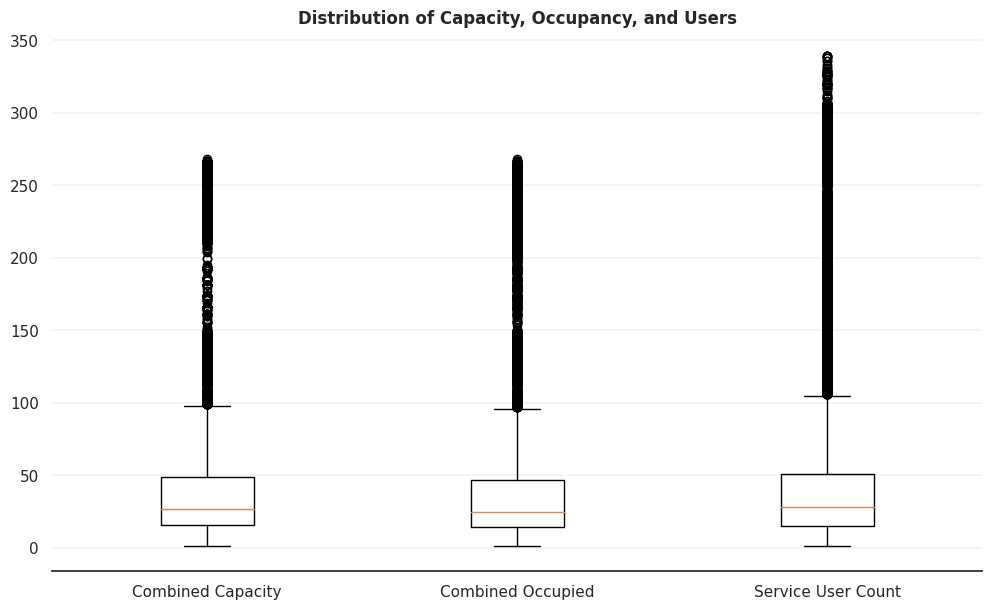

In [ ]:
# Visualize distribution for occupancy , capacity and users
fig, ax = plt.subplots(figsize=(12, 7))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
sns.set_style("white")

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# Set plot title
ax.set_title('Distribution of Capacity, Occupancy, and Users', fontweight='bold')

# Set species names as labels for the boxplot
dataset = [data['COMBINED_CAPACITY'], data['COMBINED_OCCUPIED'], data['SERVICE_USER_COUNT']]

ax.set_xticklabels(['Combined Capacity', 'Combined Occupied', 'Service User Count'])

ax.boxplot(dataset)
plt.show()

#### **Finding 10:**

Non-grahical and graphical analysis has been employed to compare combined capacity, occupancy, and number of users. It is important to higlight the difference between combined occupancy and service user counts: combined occupancy reflects the occupancy number of beds and rooms, while service user counts presents the occupancy number of individuals.Considering that some rooms can accomodate more than 1 individual the number of users are higher.

The meadian and IQR data for bed-room capacity-occupancy and user count are almost equal while the total of the user counts are substantially higher.

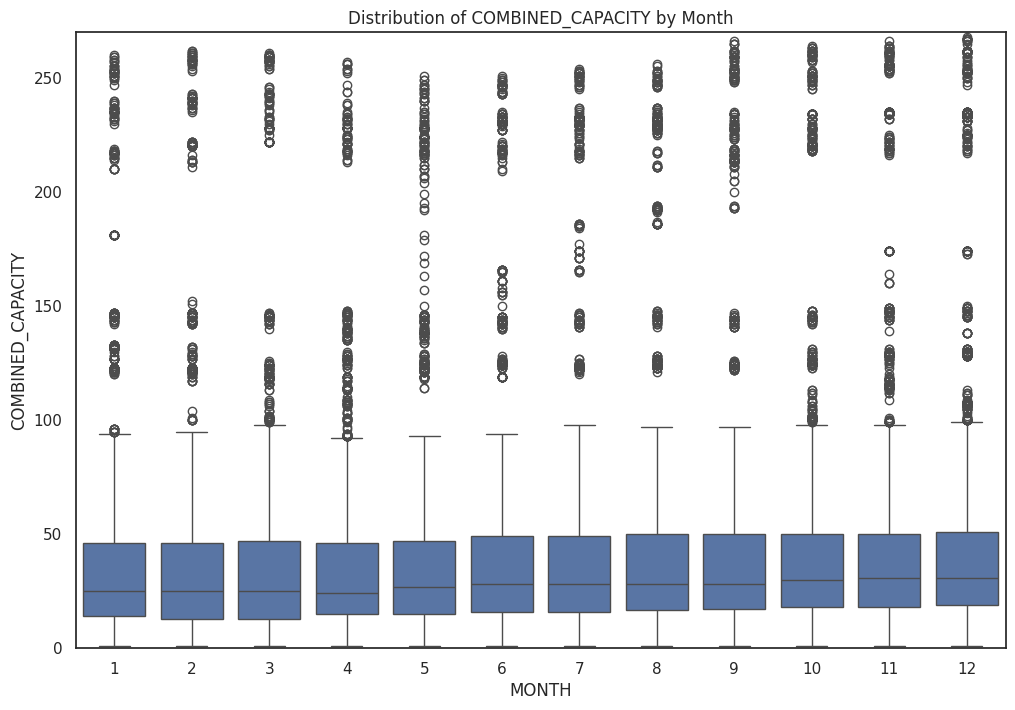

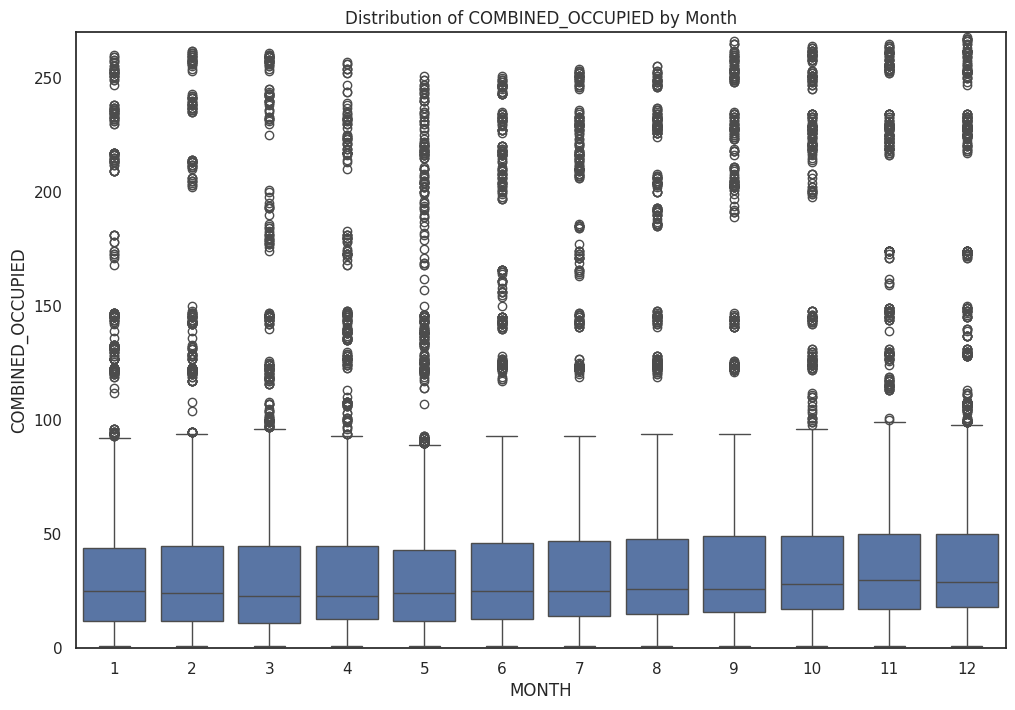

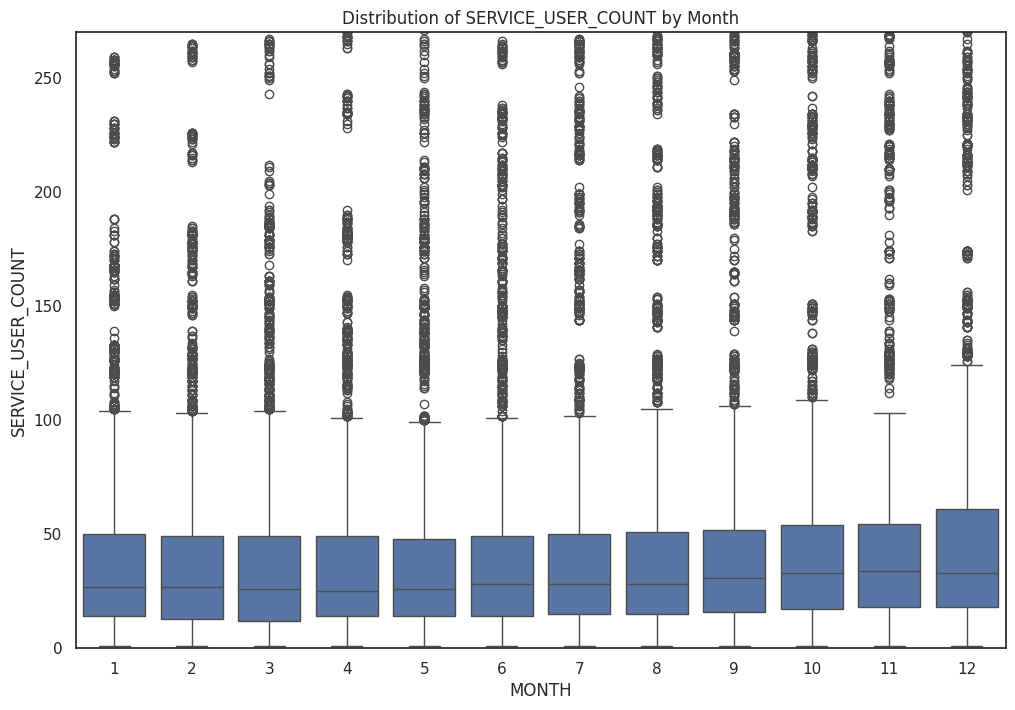

In [ ]:
# Calciulate based on the monthly data
def boxplot_month (data, var_num):
  filtered_data = data[data[var_num] != 0]
  sns.set_style("white")
  plt.figure(figsize=(12, 8))
  sns.boxplot(x='MONTH', y=var_num, data=filtered_data, whis=1.5)
  plt.ylim(bottom=lower_limit, top=upper_limit)
  plt.title(f'Distribution of {var_num} by Month')
  plt.show()

lower_limit = 0
upper_limit = 270

boxplot_month (data,'COMBINED_CAPACITY')
boxplot_month (data,'COMBINED_OCCUPIED')
boxplot_month (data,'SERVICE_USER_COUNT')


#### **Finding 10 (cont.):**

The montly distribution of data reflect the total distribution: median and IQR are equal, and the data has lots of outliyers.

# **Hypothesis Testing**

NOTE: Non-parametric has been used because that the data is highly skewed.


**Difference in program models**

Null Hypothesis (H0): There is no significant difference in the service user count between emergency and transitional program models

Alternative Hypothesis (H1): There is a significant difference in the service user count between emergency and transitional program models



In [ ]:

emergency_occupancy = data[data['PROGRAM_MODEL'] == 'Emergency']['SERVICE_USER_COUNT']
transitional_occupancy = data[data['PROGRAM_MODEL'] == 'Transitional']['SERVICE_USER_COUNT']

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(emergency_occupancy, transitional_occupancy)

# Print the results
print(f'Mann-Whitney U Statistic: {statistic}')
print (f'The significance level = 0.05')
print(f'P-value: {p_value}')


Mann-Whitney U Statistic: 241789588.5
The significance level = 0.05
P-value: 2.7784451994713995e-288


**Result**

The calculated Mann-Whitney U statistic is 241,789,588.5, and the associated p-value is approximately 2.78 * 10^(− 288). The p value is extremely low and below 0.05 significance level; therefore, reject the null hypothesis. There is a significant difference of the service users between emergency and transitional programs.


**Difference in capacity types**

Null Hypothesis (H0):
There is no significant difference in the service user counts between shelter programs with Bed-Based Capacity and those with Room-Based Capacity.

Alternative Hypothesis (H1):
There is a significant difference in the service user counts between shelter programs with Bed-Based Capacity and those with Room-Based Capacity.

In [ ]:
bed_capacity = data[data['CAPACITY_TYPE'] == 'Bed Based Capacity']['SERVICE_USER_COUNT']
room_capacity= data[data['CAPACITY_TYPE'] == 'Room Based Capacity']['SERVICE_USER_COUNT']

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(bed_capacity, room_capacity)

# Print the results
print(f'Mann-Whitney U Statistic: {statistic}')
print (f'The significance level = 0.05')
print(f'P-value: {p_value}')


Mann-Whitney U Statistic: 181722970.0
The significance level = 0.05
P-value: 0.0


#### **Result**

The Mann-Whitney U statistic is 181,722,970, and the p-value associated with this test is reported as 0.0. Given that the p-value is less than the significance level (p < alpha), the null hypothesis is rejected.

### **Sources:**

1. Explorytory Data Analysis in Python
https://app.datacamp.com/learn/courses/exploratory-data-analysis-in-python

2. Step-by-Step Exploratory Data Analysis (EDA) using Python
https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/

3. EDA - Exploratory Data Analysis: Using Python Functions
https://www.digitalocean.com/community/tutorials/exploratory-data-analysis-python

4. EDA | Exploratory Data Analysis in Python
https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/

5. Mukhiya, S. K., & Ahmed, U. (2020). Hands-On Exploratory Data Analysis with
Python: Perform EDA techniques to understand, summarize, and investigate your data. Packt Publishing Ltd.



